# Описание задачи

Музыкальный стриминговый сервис расширяет работу с новыми артистами и музыкантами, в связи с чем необходимо правильно классифицировать новые музыкальные треки, чтобы улучшить работу рекомендательной системы. В датасете собраны некоторые характеристики музыкальных произведений и их жанры.

**Задача** - разработать модель, позволяющую классифицировать музыкальные произведения по жанрам. Для каждого трека нужно предсказать категориальное значение, соответствующее музыкальному жанру трека.

# Описание данных

Данные
- `kaggle_music_genre_train.csv` - информация (~20000) музыкальных треках, которые будут использоваться в качестве обучающих данных.
- `kaggle_music_genre_test.csv` - информация (~5000) музыкальных треках, которые будут использоваться в качестве тестовых данных.

- `sample_submit.csv` - файл предсказаний в правильном формате.

- `instance_id` - идентификатор трека в тестовом наборе.
- `music_genre` - Целевой признак. 


**Описание полей данных**


- `instance_id` - уникальный идентификатор трека
- `track_name` - название трека
- `acousticness` - акустичность
- `danceability` - танцевальность
- `duration_ms` -продолжительность в милисекундах
- `energy` - энергичность
- `instrumentalness` - инструментальность
- `key` - базовый ключ (нота) произведения
- `liveness` - привлекательность
- `loudness` - громкость
- `mode` - указывает на модальность (мажорную или минорную) трека
- `speechiness` - выразительность
- `tempo` - темп
- `obtained_date` - дата загрузки в сервис
- `valence` - привлекательность произведения для пользователей сервиса
- `music_genre` - музыкальный жанр

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузим-необходимые-библиотеки" data-toc-modified-id="Загрузим-необходимые-библиотеки-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузим необходимые библиотеки</a></span></li><li><span><a href="#Загрузим-данные" data-toc-modified-id="Загрузим-данные-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузим данные</a></span></li><li><span><a href="#Изучим-данные" data-toc-modified-id="Изучим-данные-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Изучим данные</a></span><ul class="toc-item"><li><span><a href="#Проведем-первичный-анализ" data-toc-modified-id="Проведем-первичный-анализ-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Проведем первичный анализ</a></span><ul class="toc-item"><li><span><a href="#Объявим-функцию-description-для-изучения-датасетов" data-toc-modified-id="Объявим-функцию-description-для-изучения-датасетов-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Объявим функцию <code>description</code> для изучения датасетов</a></span></li><li><span><a href="#Изучим-обучающий-датасет-data" data-toc-modified-id="Изучим-обучающий-датасет-data-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Изучим обучающий датасет <code>data</code></a></span></li><li><span><a href="#Изучим-тестовый-датасет-data_test" data-toc-modified-id="Изучим-тестовый-датасет-data_test-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Изучим тестовый датасет <code>data_test</code></a></span></li></ul></li><li><span><a href="#Выводы-по-результатам-первичного-анализа" data-toc-modified-id="Выводы-по-результатам-первичного-анализа-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Выводы по результатам первичного анализа</a></span></li><li><span><a href="#Изучим,-как-распределяются-признаки-в-зависимости-от-целевого-признака" data-toc-modified-id="Изучим,-как-распределяются-признаки-в-зависимости-от-целевого-признака-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Изучим, как распределяются признаки в зависимости от целевого признака</a></span></li><li><span><a href="#Изучим-балансировку-классов-в-обучающей-выборке" data-toc-modified-id="Изучим-балансировку-классов-в-обучающей-выборке-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Изучим балансировку классов в обучающей выборке</a></span></li><li><span><a href="#Изучим-выбросы-в-обучающей-выборке" data-toc-modified-id="Изучим-выбросы-в-обучающей-выборке-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Изучим выбросы в обучающей выборке</a></span></li></ul></li><li><span><a href="#Заполним-пропущеные-данные-и-обработаем-недостоверные-значения" data-toc-modified-id="Заполним-пропущеные-данные-и-обработаем-недостоверные-значения-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Заполним пропущеные данные и обработаем недостоверные значения</a></span><ul class="toc-item"><li><span><a href="#Объявим-функцию,-которая-удалит-неверные-значения-в-числовых-признаках-и-заполнит-пропуски-с-помощью-метода-ближайших-соседей,-а-пропуски-в-категориальных-признаках-заполнит-значением-Unknown" data-toc-modified-id="Объявим-функцию,-которая-удалит-неверные-значения-в-числовых-признаках-и-заполнит-пропуски-с-помощью-метода-ближайших-соседей,-а-пропуски-в-категориальных-признаках-заполнит-значением-Unknown-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Объявим функцию, которая удалит неверные значения в числовых признаках и заполнит пропуски с помощью метода ближайших соседей, а пропуски в категориальных признаках заполнит значением <code>Unknown</code></a></span></li><li><span><a href="#Результаты-обработки-исходных-данных" data-toc-modified-id="Результаты-обработки-исходных-данных-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Результаты обработки исходных данных</a></span></li><li><span><a href="#Создадим-новые-признаки-из-количественных-данных" data-toc-modified-id="Создадим-новые-признаки-из-количественных-данных-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Создадим новые признаки из количественных данных</a></span><ul class="toc-item"><li><span><a href="#Объявим-функцию,-которая-извлечет-признак-классической-музыки-из-названия-композиции-по-ключевым-словам,-характерным-для-классических-произведений" data-toc-modified-id="Объявим-функцию,-которая-извлечет-признак-классической-музыки-из-названия-композиции-по-ключевым-словам,-характерным-для-классических-произведений-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Объявим функцию, которая извлечет признак классической музыки из названия композиции по ключевым словам, характерным для классических произведений</a></span></li><li><span><a href="#Объявим-функцию,-которая-извлечет-признак-популярной-(рок,-поп,-хип-хоп,-рэп)-музыки-из-наименования-композиции-по-ключевым-словам" data-toc-modified-id="Объявим-функцию,-которая-извлечет-признак-популярной-(рок,-поп,-хип-хоп,-рэп)-музыки-из-наименования-композиции-по-ключевым-словам-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Объявим функцию, которая извлечет признак популярной (рок, поп, хип-хоп, рэп) музыки из наименования композиции по ключевым словам</a></span></li><li><span><a href="#Объявим-функцию,-которая-извлечет-признак-анимэ-из-наименования-композиции-по-наличию-японских-иероглифов" data-toc-modified-id="Объявим-функцию,-которая-извлечет-признак-анимэ-из-наименования-композиции-по-наличию-японских-иероглифов-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Объявим функцию, которая извлечет признак анимэ из наименования композиции по наличию японских иероглифов</a></span></li><li><span><a href="#Объявим-функцию,-которая-создаст-новые-признаки-из-количественных-данных" data-toc-modified-id="Объявим-функцию,-которая-создаст-новые-признаки-из-количественных-данных-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Объявим функцию, которая создаст новые признаки из количественных данных</a></span></li><li><span><a href="#Добавим-в-датасет-новые-синтетические-признаки" data-toc-modified-id="Добавим-в-датасет-новые-синтетические-признаки-4.3.5"><span class="toc-item-num">4.3.5&nbsp;&nbsp;</span>Добавим в датасет новые синтетические признаки</a></span></li><li><span><a href="#В-датасет-включены-следующие-новые-синтетические-признаки,-полученные-из-информации,-содержащейся-в-названиях-треков:" data-toc-modified-id="В-датасет-включены-следующие-новые-синтетические-признаки,-полученные-из-информации,-содержащейся-в-названиях-треков:-4.3.6"><span class="toc-item-num">4.3.6&nbsp;&nbsp;</span>В датасет включены следующие новые синтетические признаки, полученные из информации, содержащейся в названиях треков:</a></span></li></ul></li></ul></li><li><span><a href="#Создадим-из-data-набор-признаков-и-массив-целевого-признака" data-toc-modified-id="Создадим-из-data-набор-признаков-и-массив-целевого-признака-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Создадим из <code>data</code> набор признаков и массив целевого признака</a></span><ul class="toc-item"><li><span><a href="#Объявим-функцию-features_maker,-которая-будет-удалять-из-датасета-ненужные-столбцы-и-присваивать-категориальным-признакам-тип-category" data-toc-modified-id="Объявим-функцию-features_maker,-которая-будет-удалять-из-датасета-ненужные-столбцы-и-присваивать-категориальным-признакам-тип-category-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Объявим функцию <code>features_maker</code>, которая будет удалять из датасета ненужные столбцы и присваивать категориальным признакам тип <code>category</code></a></span></li><li><span><a href="#Создадим-массив-признаков-и-массив-целевого-признака" data-toc-modified-id="Создадим-массив-признаков-и-массив-целевого-признака-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Создадим массив признаков и массив целевого признака</a></span></li></ul></li><li><span><a href="#Обучим-модели" data-toc-modified-id="Обучим-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучим модели</a></span><ul class="toc-item"><li><span><a href="#Объявим-функцию,-рассчитывающую-метрику-f1_micro,-и-определим-ее-в-качестве-метрики-качества-в-обучаемых-моделях" data-toc-modified-id="Объявим-функцию,-рассчитывающую-метрику-f1_micro,-и-определим-ее-в-качестве-метрики-качества-в-обучаемых-моделях-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Объявим функцию, рассчитывающую метрику <code>f1_micro</code>, и определим ее в качестве метрики качества в обучаемых моделях</a></span></li><li><span><a href="#Обучим-и-протестируем-модель-LogisticRegression-методом-кросс-валидации" data-toc-modified-id="Обучим-и-протестируем-модель-LogisticRegression-методом-кросс-валидации-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Обучим и протестируем модель <code>LogisticRegression</code> методом <code>кросс-валидации</code></a></span><ul class="toc-item"><li><span><a href="#Зададим-неизменяемые-гиперпараметры-модели" data-toc-modified-id="Зададим-неизменяемые-гиперпараметры-модели-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Зададим неизменяемые гиперпараметры модели</a></span></li><li><span><a href="#Зададим-функцию,-балансирующую-классы" data-toc-modified-id="Зададим-функцию,-балансирующую-классы-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Зададим функцию, балансирующую классы</a></span></li><li><span><a href="#Зададим-трансформер-столбцов--и-упакуем-в-него-кодировщики" data-toc-modified-id="Зададим-трансформер-столбцов--и-упакуем-в-него-кодировщики-6.2.3"><span class="toc-item-num">6.2.3&nbsp;&nbsp;</span>Зададим трансформер столбцов  и упакуем в него кодировщики</a></span></li><li><span><a href="#Объявим-шаги,-которые-будут-исполняться-в-Pipline" data-toc-modified-id="Объявим-шаги,-которые-будут-исполняться-в-Pipline-6.2.4"><span class="toc-item-num">6.2.4&nbsp;&nbsp;</span>Объявим шаги, которые будут исполняться в <code>Pipline</code></a></span></li><li><span><a href="#Зададим-диапазоны-гиперпараметров-для-поиска-оптимальной-метрики-f1-методом-кросс-валидации" data-toc-modified-id="Зададим-диапазоны-гиперпараметров-для-поиска-оптимальной-метрики-f1-методом-кросс-валидации-6.2.5"><span class="toc-item-num">6.2.5&nbsp;&nbsp;</span>Зададим диапазоны гиперпараметров для поиска оптимальной метрики <code>f1</code> методом <code>кросс-валидации</code></a></span></li><li><span><a href="#Объявим-функцию-поиска-оптимальных-гиперпараметров" data-toc-modified-id="Объявим-функцию-поиска-оптимальных-гиперпараметров-6.2.6"><span class="toc-item-num">6.2.6&nbsp;&nbsp;</span>Объявим функцию поиска оптимальных гиперпараметров</a></span></li><li><span><a href="#Проведем-поиск-оптимальных-гиперпараметров" data-toc-modified-id="Проведем-поиск-оптимальных-гиперпараметров-6.2.7"><span class="toc-item-num">6.2.7&nbsp;&nbsp;</span>Проведем поиск оптимальных гиперпараметров</a></span></li></ul></li><li><span><a href="#Обучим-и-протестируем-модель-HistGradientBoostingClassifier-методом-кросс-валидации" data-toc-modified-id="Обучим-и-протестируем-модель-HistGradientBoostingClassifier-методом-кросс-валидации-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Обучим и протестируем модель <code>HistGradientBoostingClassifier</code> методом <code>кросс-валидации</code></a></span><ul class="toc-item"><li><span><a href="#Зададим-неизменяемые-гиперпараметры-модели" data-toc-modified-id="Зададим-неизменяемые-гиперпараметры-модели-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Зададим неизменяемые гиперпараметры модели</a></span></li><li><span><a href="#Зададим-функцию,-балансирующую-классы" data-toc-modified-id="Зададим-функцию,-балансирующую-классы-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Зададим функцию, балансирующую классы</a></span></li><li><span><a href="#Зададим-трансформер-столбцов--и-упакуем-в-него-кодировщики" data-toc-modified-id="Зададим-трансформер-столбцов--и-упакуем-в-него-кодировщики-6.3.3"><span class="toc-item-num">6.3.3&nbsp;&nbsp;</span>Зададим трансформер столбцов  и упакуем в него кодировщики</a></span></li><li><span><a href="#Объявим-шаги,-которые-будут-исполняться-в-Pipline" data-toc-modified-id="Объявим-шаги,-которые-будут-исполняться-в-Pipline-6.3.4"><span class="toc-item-num">6.3.4&nbsp;&nbsp;</span>Объявим шаги, которые будут исполняться в <code>Pipline</code></a></span></li><li><span><a href="#Зададим-диапазоны-гиперпараметров-для-поиска-оптимальной-метрики-f1-методом-кросс-валидации" data-toc-modified-id="Зададим-диапазоны-гиперпараметров-для-поиска-оптимальной-метрики-f1-методом-кросс-валидации-6.3.5"><span class="toc-item-num">6.3.5&nbsp;&nbsp;</span>Зададим диапазоны гиперпараметров для поиска оптимальной метрики <code>f1</code> методом <code>кросс-валидации</code></a></span></li><li><span><a href="#Объявим-функцию-поиска-оптимальных-гиперпараметров" data-toc-modified-id="Объявим-функцию-поиска-оптимальных-гиперпараметров-6.3.6"><span class="toc-item-num">6.3.6&nbsp;&nbsp;</span>Объявим функцию поиска оптимальных гиперпараметров</a></span></li><li><span><a href="#Проведем-поиск-оптимальных-гиперпараметров" data-toc-modified-id="Проведем-поиск-оптимальных-гиперпараметров-6.3.7"><span class="toc-item-num">6.3.7&nbsp;&nbsp;</span>Проведем поиск оптимальных гиперпараметров</a></span></li></ul></li><li><span><a href="#Обучим-и-протестируем-модель-RandomForestClassifier-методом-кросс-валидации" data-toc-modified-id="Обучим-и-протестируем-модель-RandomForestClassifier-методом-кросс-валидации-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Обучим и протестируем модель <code>RandomForestClassifier</code> методом <code>кросс-валидации</code></a></span><ul class="toc-item"><li><span><a href="#Зададим-неизменяемые-гиперпараметры-модели" data-toc-modified-id="Зададим-неизменяемые-гиперпараметры-модели-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Зададим неизменяемые гиперпараметры модели</a></span></li><li><span><a href="#Зададим-трансформер-столбцов--и-упакуем-в-него-кодировщики" data-toc-modified-id="Зададим-трансформер-столбцов--и-упакуем-в-него-кодировщики-6.4.2"><span class="toc-item-num">6.4.2&nbsp;&nbsp;</span>Зададим трансформер столбцов  и упакуем в него кодировщики</a></span></li><li><span><a href="#Объявим-шаги,-которые-будут-исполняться-в-Pipline" data-toc-modified-id="Объявим-шаги,-которые-будут-исполняться-в-Pipline-6.4.3"><span class="toc-item-num">6.4.3&nbsp;&nbsp;</span>Объявим шаги, которые будут исполняться в <code>Pipline</code></a></span></li><li><span><a href="#Зададим-диапазоны-гиперпараметров-для-поиска-оптимальной-метрики-f1-методом-кросс-валидации" data-toc-modified-id="Зададим-диапазоны-гиперпараметров-для-поиска-оптимальной-метрики-f1-методом-кросс-валидации-6.4.4"><span class="toc-item-num">6.4.4&nbsp;&nbsp;</span>Зададим диапазоны гиперпараметров для поиска оптимальной метрики <code>f1</code> методом <code>кросс-валидации</code></a></span></li><li><span><a href="#Объявим-функцию-поиска-оптимальных-гиперпараметров" data-toc-modified-id="Объявим-функцию-поиска-оптимальных-гиперпараметров-6.4.5"><span class="toc-item-num">6.4.5&nbsp;&nbsp;</span>Объявим функцию поиска оптимальных гиперпараметров</a></span></li><li><span><a href="#Проведем-поиск-оптимальных-гиперпараметров" data-toc-modified-id="Проведем-поиск-оптимальных-гиперпараметров-6.4.6"><span class="toc-item-num">6.4.6&nbsp;&nbsp;</span>Проведем поиск оптимальных гиперпараметров</a></span></li></ul></li><li><span><a href="#Обучим-модель-LGBMClassifier" data-toc-modified-id="Обучим-модель-LGBMClassifier-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Обучим модель <code>LGBMClassifier</code></a></span><ul class="toc-item"><li><span><a href="#Зададим-неизменяемые-гиперпараметры-модели" data-toc-modified-id="Зададим-неизменяемые-гиперпараметры-модели-6.5.1"><span class="toc-item-num">6.5.1&nbsp;&nbsp;</span>Зададим неизменяемые гиперпараметры модели</a></span></li><li><span><a href="#Зададим-энкодеры-и-трансформеры" data-toc-modified-id="Зададим-энкодеры-и-трансформеры-6.5.2"><span class="toc-item-num">6.5.2&nbsp;&nbsp;</span>Зададим энкодеры и трансформеры</a></span></li><li><span><a href="#Объявим-шаги,-которые-будут-исполняться-в-Pipline" data-toc-modified-id="Объявим-шаги,-которые-будут-исполняться-в-Pipline-6.5.3"><span class="toc-item-num">6.5.3&nbsp;&nbsp;</span>Объявим шаги, которые будут исполняться в <code>Pipline</code></a></span></li><li><span><a href="#Зададим-диапазоны-гиперпараметров-для-поиска-оптимальной-метрики-f1-micro-методом-кросс-валидации" data-toc-modified-id="Зададим-диапазоны-гиперпараметров-для-поиска-оптимальной-метрики-f1-micro-методом-кросс-валидации-6.5.4"><span class="toc-item-num">6.5.4&nbsp;&nbsp;</span>Зададим диапазоны гиперпараметров для поиска оптимальной метрики <code>f1-micro</code> методом <code>кросс-валидации</code></a></span></li><li><span><a href="#Объявим-функцию-GridSearchCV-для-поиска-оптимальных-гиперпараметров" data-toc-modified-id="Объявим-функцию-GridSearchCV-для-поиска-оптимальных-гиперпараметров-6.5.5"><span class="toc-item-num">6.5.5&nbsp;&nbsp;</span>Объявим функцию <code>GridSearchCV</code> для поиска оптимальных гиперпараметров</a></span></li><li><span><a href="#Проведем-поиск-оптимальных-гиперпараметров" data-toc-modified-id="Проведем-поиск-оптимальных-гиперпараметров-6.5.6"><span class="toc-item-num">6.5.6&nbsp;&nbsp;</span>Проведем поиск оптимальных гиперпараметров</a></span></li></ul></li><li><span><a href="#Обучим-модель-CatBoost" data-toc-modified-id="Обучим-модель-CatBoost-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Обучим модель <code>CatBoost</code></a></span><ul class="toc-item"><li><span><a href="#Зададим-неизменяемые-гиперпараметры-модели" data-toc-modified-id="Зададим-неизменяемые-гиперпараметры-модели-6.6.1"><span class="toc-item-num">6.6.1&nbsp;&nbsp;</span>Зададим неизменяемые гиперпараметры модели</a></span></li><li><span><a href="#Зададим-энкодеры-и-трансформеры" data-toc-modified-id="Зададим-энкодеры-и-трансформеры-6.6.2"><span class="toc-item-num">6.6.2&nbsp;&nbsp;</span>Зададим энкодеры и трансформеры</a></span></li><li><span><a href="#Объявим-шаги,-которые-будут-исполняться-в-Pipline" data-toc-modified-id="Объявим-шаги,-которые-будут-исполняться-в-Pipline-6.6.3"><span class="toc-item-num">6.6.3&nbsp;&nbsp;</span>Объявим шаги, которые будут исполняться в <code>Pipline</code></a></span></li><li><span><a href="#Зададим-диапазоны-гиперпараметров-для-поиска-оптимальной-метрики-f1-micro-методом-кросс-валидации" data-toc-modified-id="Зададим-диапазоны-гиперпараметров-для-поиска-оптимальной-метрики-f1-micro-методом-кросс-валидации-6.6.4"><span class="toc-item-num">6.6.4&nbsp;&nbsp;</span>Зададим диапазоны гиперпараметров для поиска оптимальной метрики <code>f1-micro</code> методом <code>кросс-валидации</code></a></span></li><li><span><a href="#Объявим-функцию-GridSearchCV-для-поиска-оптимальных-гиперпараметров" data-toc-modified-id="Объявим-функцию-GridSearchCV-для-поиска-оптимальных-гиперпараметров-6.6.5"><span class="toc-item-num">6.6.5&nbsp;&nbsp;</span>Объявим функцию <code>GridSearchCV</code> для поиска оптимальных гиперпараметров</a></span></li><li><span><a href="#Проведем-поиск-оптимальных-гиперпараметров" data-toc-modified-id="Проведем-поиск-оптимальных-гиперпараметров-6.6.6"><span class="toc-item-num">6.6.6&nbsp;&nbsp;</span>Проведем поиск оптимальных гиперпараметров</a></span></li></ul></li><li><span><a href="#Включим-в-стековую-модель-StackingClassifier-лучшие-модели-для-осуществления-наиболее-точного-прогнозирования-жанра-музыкалькой-композиции-путем-сравнения-прогнозов-моделей" data-toc-modified-id="Включим-в-стековую-модель-StackingClassifier-лучшие-модели-для-осуществления-наиболее-точного-прогнозирования-жанра-музыкалькой-композиции-путем-сравнения-прогнозов-моделей-6.7"><span class="toc-item-num">6.7&nbsp;&nbsp;</span>Включим в <code>стековую</code> модель <code>StackingClassifier</code> лучшие модели для осуществления наиболее точного прогнозирования жанра музыкалькой композиции путем сравнения прогнозов моделей</a></span></li></ul></li><li><span><a href="#Проверим-стекинговую--модель-StackingClassifier-на-выделеной-из-обучающего-датасета-тестовой-выборке" data-toc-modified-id="Проверим-стекинговую--модель-StackingClassifier-на-выделеной-из-обучающего-датасета-тестовой-выборке-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Проверим стекинговую  модель <code>StackingClassifier</code> на выделеной из обучающего датасета тестовой выборке</a></span><ul class="toc-item"><li><span><a href="#Выделим-из-обучающего-датасета-обучающую-и-стратифицированную-тестовую-выборку" data-toc-modified-id="Выделим-из-обучающего-датасета-обучающую-и-стратифицированную-тестовую-выборку-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Выделим из обучающего датасета обучающую и стратифицированную тестовую выборку</a></span></li><li><span><a href="#Обучим-стекинговую-модель-на-выделенной-обучающей-выборке-и-проверим-на-тестовой-выборке" data-toc-modified-id="Обучим-стекинговую-модель-на-выделенной-обучающей-выборке-и-проверим-на-тестовой-выборке-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Обучим стекинговую модель на выделенной обучающей выборке и проверим на тестовой выборке</a></span></li><li><span><a href="#Проверим-стекинговую-модель-на-адекватность" data-toc-modified-id="Проверим-стекинговую-модель-на-адекватность-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Проверим стекинговую модель на адекватность</a></span><ul class="toc-item"><li><span><a href="#Проверка-модели-на-адекватность-путем-сравнения-метрики-f1-прогноза,-полученного-на-тестовой-выборке,-с-фиктивным-прогнозом" data-toc-modified-id="Проверка-модели-на-адекватность-путем-сравнения-метрики-f1-прогноза,-полученного-на-тестовой-выборке,-с-фиктивным-прогнозом-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>Проверка модели на адекватность путем сравнения метрики <code>f1</code> прогноза, полученного на тестовой выборке, с фиктивным прогнозом</a></span></li></ul></li></ul></li><li><span><a href="#Обучим-модель-на-полной-выборке-и-создадим-прогноз-для-финального-тестирования" data-toc-modified-id="Обучим-модель-на-полной-выборке-и-создадим-прогноз-для-финального-тестирования-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Обучим модель на полной выборке и создадим прогноз для финального тестирования</a></span><ul class="toc-item"><li><span><a href="#Заполним-пропуски-в-данных-тестового-датасета-и-обработаем-ошибочные-значения,-аналогично-обучающему-датасету" data-toc-modified-id="Заполним-пропуски-в-данных-тестового-датасета-и-обработаем-ошибочные-значения,-аналогично-обучающему-датасету-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Заполним пропуски в данных тестового датасета и обработаем ошибочные значения, аналогично обучающему датасету</a></span></li><li><span><a href="#Введем-новые-признаки-в-тестовый-датасет,-аналогично-обучающему" data-toc-modified-id="Введем-новые-признаки-в-тестовый-датасет,-аналогично-обучающему-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Введем новые признаки в тестовый датасет, аналогично обучающему</a></span></li><li><span><a href="#Создадим-обучающую-выборку-из-всего-обучающего-датасета" data-toc-modified-id="Создадим-обучающую-выборку-из-всего-обучающего-датасета-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Создадим обучающую выборку из всего обучающего датасета</a></span></li><li><span><a href="#Создадим-тестовую-выборку-из-тестового-датасета" data-toc-modified-id="Создадим-тестовую-выборку-из-тестового-датасета-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Создадим тестовую выборку из тестового датасета</a></span></li><li><span><a href="#Обучим-стекинговую-модель-на-полной-обучающей-выборке-и-осуществим-предсказание-на-тестовой" data-toc-modified-id="Обучим-стекинговую-модель-на-полной-обучающей-выборке-и-осуществим-предсказание-на-тестовой-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>Обучим стекинговую модель на полной обучающей выборке и осуществим предсказание на тестовой</a></span></li><li><span><a href="#Создадим-по-образцу-файл-с-прогнозом-и-запишем-его-на-диск-для-отправки-на-тестирование" data-toc-modified-id="Создадим-по-образцу-файл-с-прогнозом-и-запишем-его-на-диск-для-отправки-на-тестирование-8.6"><span class="toc-item-num">8.6&nbsp;&nbsp;</span>Создадим по образцу файл с прогнозом и запишем его на диск для отправки на тестирование</a></span><ul class="toc-item"><li><span><a href="#Запишем-на-диск-и-отправим-на-проверку" data-toc-modified-id="Запишем-на-диск-и-отправим-на-проверку-8.6.1"><span class="toc-item-num">8.6.1&nbsp;&nbsp;</span>Запишем на диск и отправим на проверку</a></span></li><li><span><a href="#Модель,-получившая-результат,-отправленный-на-финальное-тестирование" data-toc-modified-id="Модель,-получившая-результат,-отправленный-на-финальное-тестирование-8.6.2"><span class="toc-item-num">8.6.2&nbsp;&nbsp;</span>Модель, получившая результат, отправленный на финальное тестирование</a></span></li></ul></li><li><span><a href="#Результаты-проверки-прогноза,-сделанного-на-тестовом-датасете" data-toc-modified-id="Результаты-проверки-прогноза,-сделанного-на-тестовом-датасете-8.7"><span class="toc-item-num">8.7&nbsp;&nbsp;</span>Результаты проверки прогноза, сделанного на тестовом датасете</a></span></li></ul></li><li><span><a href="#Отчет" data-toc-modified-id="Отчет-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Отчет</a></span><ul class="toc-item"><li><span><a href="#Описание-задачи" data-toc-modified-id="Описание-задачи-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Описание задачи</a></span></li><li><span><a href="#Результаты-исследования-исходных-данных" data-toc-modified-id="Результаты-исследования-исходных-данных-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Результаты исследования исходных данных</a></span></li><li><span><a href="#Проведена-следующая-предобработка-исходных-данных-(в-обучающей-и-тестовой-выборках)" data-toc-modified-id="Проведена-следующая-предобработка-исходных-данных-(в-обучающей-и-тестовой-выборках)-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Проведена следующая предобработка исходных данных (в обучающей и тестовой выборках)</a></span></li><li><span><a href="#В-датасет-включены-следующие-новые-синтетические-признаки,-полученные-из-информации,-содержащейся-в-названиях-треков:" data-toc-modified-id="В-датасет-включены-следующие-новые-синтетические-признаки,-полученные-из-информации,-содержащейся-в-названиях-треков:-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>В датасет включены следующие новые синтетические признаки, полученные из информации, содержащейся в названиях треков:</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-9.5"><span class="toc-item-num">9.5&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-9.6"><span class="toc-item-num">9.6&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Результаты-проверки-прогноза,-сделанного-на-тестовом-датасете" data-toc-modified-id="Результаты-проверки-прогноза,-сделанного-на-тестовом-датасете-9.7"><span class="toc-item-num">9.7&nbsp;&nbsp;</span>Результаты проверки прогноза, сделанного на тестовом датасете</a></span></li></ul></li></ul></div>

## Загрузим необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import os

from sklearn.impute import KNNImputer

from sklearn.preprocessing import (OneHotEncoder, 
                                   OrdinalEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   PolynomialFeatures)

from sklearn.linear_model import LogisticRegression

from sklearn.svm import LinearSVC

from sklearn.ensemble import (RandomForestClassifier, 
                              StackingClassifier,
                              HistGradientBoostingClassifier)

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier

from sklearn.compose import (make_column_selector,
                             make_column_transformer,
                             ColumnTransformer)


from sklearn.model_selection import (train_test_split,
                                     GridSearchCV,
                                     cross_val_score)

from sklearn.metrics import (classification_report,
                             f1_score,
                             make_scorer)  

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline

import warnings

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('max_columns', None)
warnings.filterwarnings("ignore")

## Загрузим данные

In [3]:
path_1 = 'kaggle_music_genre_train.csv'
path_2 = 'kaggle_music_genre_test.csv'
path_3 = 'sample_submit.csv'


if os.path.exists(path_1):
    data = pd.read_csv(path_1, index_col=[0])
    print('Loaded data:', path_1)
    
else:
    print('Нету файла')


if os.path.exists(path_2):
    data_test = pd.read_csv(path_2, index_col=[0])
    print('Loaded data_test:', path_2)

else:
    print('Файл не найден, проверьте путь')
    
    
if os.path.exists(path_3):
    example = pd.read_csv(path_3, index_col=[0])
    print('Loaded data_test:', path_3)

else:
    print('Файл не найден, проверьте путь')

Loaded data: kaggle_music_genre_train.csv
Loaded data_test: kaggle_music_genre_test.csv
Loaded data_test: sample_submit.csv


## Изучим данные

### Проведем первичный анализ

#### Объявим функцию `description` для изучения датасетов

In [4]:
def description(data):
    
    print('1. Общая информация: \n')
    display(data.info())
    display(data.head(3))
    display(data.tail(3))

    print('\nКоличество дубликатов:', data.duplicated().sum(), '\n')

    print('\nПропущенные значения: \n')
    display(data.isna().sum())
    
    print('\nСтатистические характеристики датасета: \n')
    display(data.describe(include = 'all').T)
    data.hist(figsize = (20,20), bins = 300);
    plt.show()
    
    print('\nУникальные значения категориальных признаков: \n')
    
    try:
        print('\nЖанры: \n', data['music_genre'].unique())
        genres = data['music_genre'].value_counts(ascending = True)
        data['genre'] = 0
        code = 100
        for genre in genres.index:
            # print(genre)
            data.loc[(data[
                'music_genre'] == genre), 'genre'] = code
            code += 1
        
        
    except:
        print('\nЖанры: отсутствуют\n')
    
    print('\nТональность: \n', data['key'].unique())
    print('\nЛад: \n', data['mode'].unique())
    print('\nДата внесения в базу: \n', data['obtained_date'].unique())    
      
    print('\nПоказатели корреляции: \n')
    
    display(round(data.corr(), 2))
    plt.figure(figsize = (12, 12))
    plt.title('Корреляция между признаками');
    sns.heatmap(round(abs(data.corr()), 2), annot = True);
    plt.show()


#### Изучим обучающий датасет `data` 

1. Общая информация: 

<class 'pandas.core.frame.DataFrame'>
Float64Index: 20394 entries, 25143.0 to 86375.0
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        20394 non-null  object 
 1   acousticness      20394 non-null  float64
 2   danceability      20394 non-null  float64
 3   duration_ms       20394 non-null  float64
 4   energy            20394 non-null  float64
 5   instrumentalness  20394 non-null  float64
 6   key               19659 non-null  object 
 7   liveness          20394 non-null  float64
 8   loudness          20394 non-null  float64
 9   mode              19888 non-null  object 
 10  speechiness       20394 non-null  float64
 11  tempo             19952 non-null  float64
 12  obtained_date     20394 non-null  object 
 13  valence           20394 non-null  float64
 14  music_genre       20394 non-null  object 
dtypes: float64(10), object(5)
memory usage: 2.5+ MB


None

,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
instance_id,,,,,,,,,,,,,,,
25143.0,Highwayman,0.480,0.670,182653.0,0.351,0.017600,D,0.115,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country
26091.0,Toes Across The Floor,0.243,0.452,187133.0,0.670,0.000051,A,0.108,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock
87888.0,First Person on Earth,0.228,0.454,173448.0,0.804,0.000000,E,0.181,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative


,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
instance_id,,,,,,,,,,,,,,,
33350.0,Original Prankster,0.00061,0.663,220947.0,0.886,0.000025,D,0.284,-4.149,Major,0.0358,146.803,4-Apr,0.942,Alternative
77920.0,4Peat,0.00310,0.914,162214.0,0.515,0.000000,C#,0.105,-9.934,Major,0.3560,150.016,4-Apr,0.215,Rap
86375.0,Trouble (feat. MC Spyder),0.05350,0.717,271885.0,0.983,0.491000,D#,0.108,-1.615,Minor,0.0942,128.004,4-Apr,0.077,Electronic



Количество дубликатов: 1 


Пропущенные значения: 



track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                 735
liveness              0
loudness              0
mode                506
speechiness           0
tempo               442
obtained_date         0
valence               0
music_genre           0
dtype: int64


Статистические характеристики датасета: 



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
track_name,20394,18643,Home,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,20394.0,NaN,NaN,NaN,0.274783,0.321643,0.0,0.0152,0.12,0.47,0.996
danceability,20394.0,NaN,NaN,NaN,0.561983,0.171898,0.06,0.451,0.57,0.683,0.978
duration_ms,20394.0,NaN,NaN,NaN,220375.425272,126728.326142,-1.0,177517.0,219533.0,266000.0,4497994.0
energy,20394.0,NaN,NaN,NaN,0.625276,0.251238,0.00101,0.47,0.666,0.83,0.999
instrumentalness,20394.0,NaN,NaN,NaN,0.159989,0.306503,0.0,0.0,0.000144,0.084475,0.996
key,19659,12,G,2304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
liveness,20394.0,NaN,NaN,NaN,0.19854,0.166742,0.0136,0.0973,0.13,0.253,1.0
loudness,20394.0,NaN,NaN,NaN,-8.552998,5.499917,-44.406,-10.25575,-7.052,-5.054,3.744
mode,19888,2,Major,12828,NaN,NaN,NaN,NaN,NaN,NaN,NaN


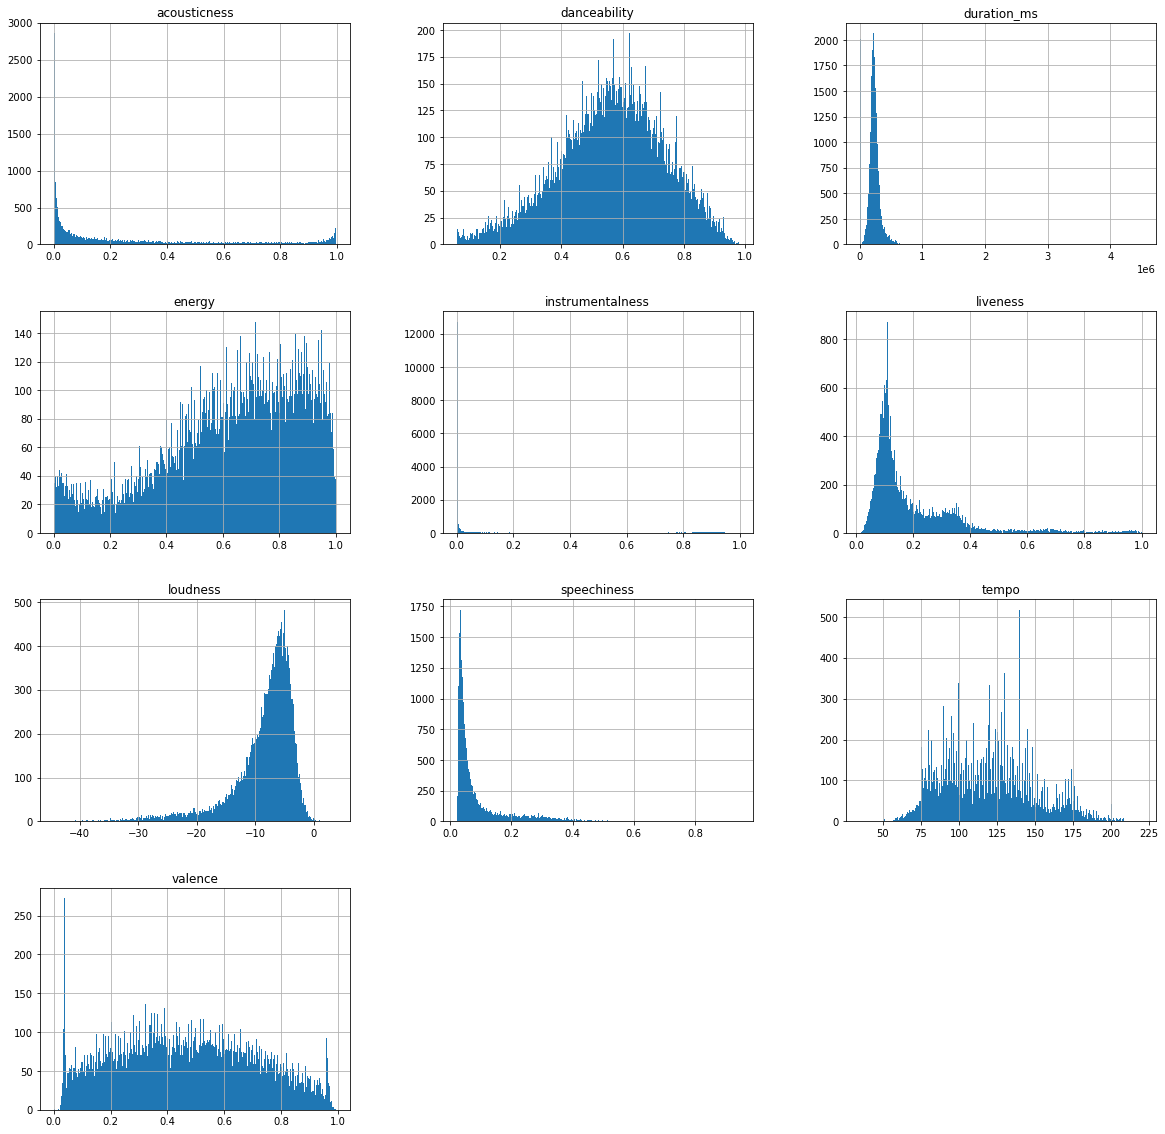


Уникальные значения категориальных признаков: 


Жанры: 
 ['Country' 'Rock' 'Alternative' 'Hip-Hop' 'Blues' 'Jazz' 'Electronic'
 'Anime' 'Rap' 'Classical']

Тональность: 
 ['D' 'A' 'E' 'G#' 'C' 'D#' 'A#' 'F' 'F#' nan 'G' 'C#' 'B']

Лад: 
 ['Major' 'Minor' nan]

Дата внесения в базу: 
 ['4-Apr' '3-Apr' '5-Apr' '1-Apr']

Показатели корреляции: 



,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
acousticness,1.00,-0.27,0.04,-0.76,0.32,-0.09,-0.70,-0.14,-0.21,-0.22,-0.25
danceability,-0.27,1.00,-0.15,0.18,-0.25,-0.08,0.32,0.26,-0.06,0.39,0.05
duration_ms,0.04,-0.15,1.00,-0.06,0.14,0.04,-0.10,-0.08,-0.04,-0.13,-0.01
energy,-0.76,0.18,-0.06,1.00,-0.32,0.18,0.82,0.15,0.25,0.35,0.25
instrumentalness,0.32,-0.25,0.14,-0.32,1.00,-0.06,-0.48,-0.18,-0.10,-0.26,-0.18
liveness,-0.09,-0.08,0.04,0.18,-0.06,1.00,0.11,0.10,0.04,0.04,0.08
loudness,-0.70,0.32,-0.10,0.82,-0.48,0.11,1.00,0.15,0.22,0.28,0.25
speechiness,-0.14,0.26,-0.08,0.15,-0.18,0.10,0.15,1.00,0.06,0.03,-0.06
tempo,-0.21,-0.06,-0.04,0.25,-0.10,0.04,0.22,0.06,1.00,0.09,0.08
valence,-0.22,0.39,-0.13,0.35,-0.26,0.04,0.28,0.03,0.09,1.00,0.11


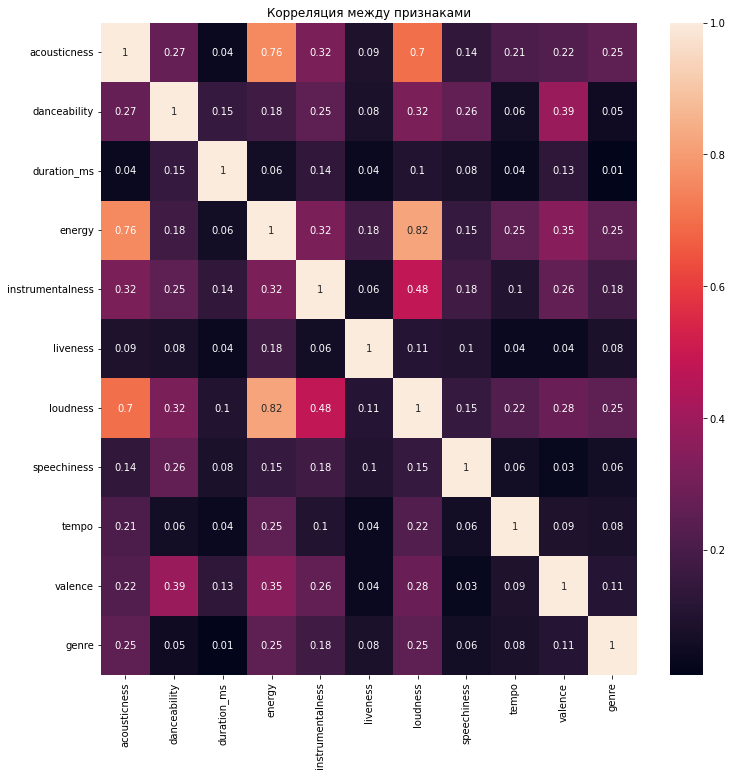

In [5]:
description(data)
data = data.drop('genre', axis = 1)

#### Изучим тестовый датасет `data_test` 

1. Общая информация: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5099 entries, 48564 to 47986
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        5099 non-null   object 
 1   acousticness      5099 non-null   float64
 2   danceability      5099 non-null   float64
 3   duration_ms       5099 non-null   float64
 4   energy            5099 non-null   float64
 5   instrumentalness  5099 non-null   float64
 6   key               4941 non-null   object 
 7   liveness          5099 non-null   float64
 8   loudness          5099 non-null   float64
 9   mode              4950 non-null   object 
 10  speechiness       5099 non-null   float64
 11  tempo             4978 non-null   float64
 12  obtained_date     5099 non-null   object 
 13  valence           5099 non-null   float64
dtypes: float64(10), object(4)
memory usage: 597.5+ KB


None

,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
instance_id,,,,,,,,,,,,,,
48564,Low Class Conspiracy,0.30100,0.757,146213.0,0.679,0.00000,A#,0.3030,-7.136,Minor,0.3560,90.361,4-Apr,0.895
72394,The Hunter,0.53800,0.256,240360.0,0.523,0.00832,G#,0.0849,-5.175,Major,0.0294,78.385,4-Apr,0.318
88081,Hate Me Now,0.00583,0.678,284000.0,0.770,0.00000,A,0.1090,-4.399,Minor,0.2220,90.000,4-Apr,0.412


,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
instance_id,,,,,,,,,,,,,,
67924,Bipolar,0.15200,0.756,243373.0,0.787,0.0000,D,0.2050,-7.423,Major,0.2400,123.405,4-Apr,0.459
79778,Dead - NGHTMRE Remix,0.00145,0.489,185600.0,0.974,0.6380,F#,0.1230,-2.857,Minor,0.0381,150.036,4-Apr,0.665
47986,A Night In Tunisia - Remastered 1998 / Rudy Van Gelder Edition,0.71500,0.538,256800.0,0.520,0.0175,G,0.0676,-10.127,Minor,0.0408,83.816,4-Apr,0.764



Количество дубликатов: 30 


Пропущенные значения: 



track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                 158
liveness              0
loudness              0
mode                149
speechiness           0
tempo               121
obtained_date         0
valence               0
dtype: int64


Статистические характеристики датасета: 



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
track_name,5099,4981,Hurricane,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,5099.0,NaN,NaN,NaN,0.276324,0.322657,0.000002,0.0166,0.12,0.46,0.996
danceability,5099.0,NaN,NaN,NaN,0.561888,0.170502,0.0596,0.451,0.568,0.681,0.977
duration_ms,5099.0,NaN,NaN,NaN,217397.407727,115637.408282,-1.0,173733.5,217500.0,264247.0,1360027.0
energy,5099.0,NaN,NaN,NaN,0.62203,0.251829,0.00154,0.465,0.66,0.826,0.999
instrumentalness,5099.0,NaN,NaN,NaN,0.165198,0.31194,0.0,0.0,0.000157,0.09275,0.994
key,4941,12,D,557,NaN,NaN,NaN,NaN,NaN,NaN,NaN
liveness,5099.0,NaN,NaN,NaN,0.197924,0.166241,0.0204,0.09695,0.129,0.248,0.99
loudness,5099.0,NaN,NaN,NaN,-8.630186,5.619766,-46.122,-10.231,-7.135,-5.127,1.949
mode,4950,2,Major,3177,NaN,NaN,NaN,NaN,NaN,NaN,NaN


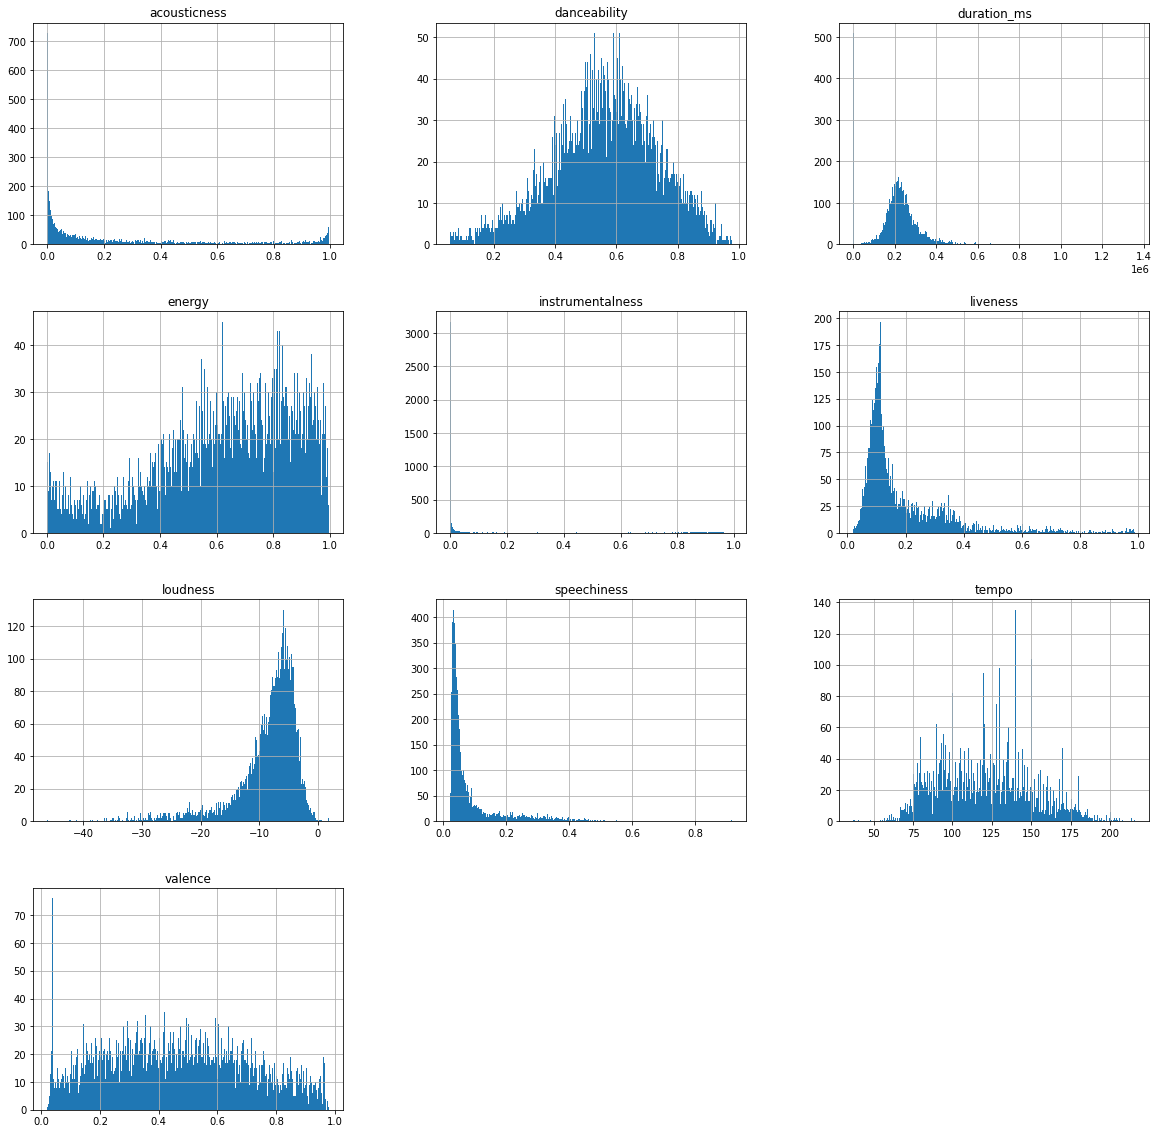


Уникальные значения категориальных признаков: 


Жанры: отсутствуют


Тональность: 
 ['A#' 'G#' 'A' 'B' 'D' 'F#' 'F' 'G' 'C' nan 'D#' 'C#' 'E']

Лад: 
 ['Minor' 'Major' nan]

Дата внесения в базу: 
 ['4-Apr' '3-Apr' '5-Apr' '1-Apr']

Показатели корреляции: 



,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
acousticness,1.00,-0.26,0.03,-0.77,0.33,-0.09,-0.70,-0.13,-0.21,-0.21
danceability,-0.26,1.00,-0.13,0.17,-0.24,-0.07,0.30,0.24,-0.06,0.40
duration_ms,0.03,-0.13,1.00,-0.05,0.12,-0.00,-0.09,-0.08,-0.03,-0.13
energy,-0.77,0.17,-0.05,1.00,-0.33,0.17,0.82,0.13,0.24,0.34
instrumentalness,0.33,-0.24,0.12,-0.33,1.00,-0.08,-0.50,-0.17,-0.09,-0.25
liveness,-0.09,-0.07,-0.00,0.17,-0.08,1.00,0.11,0.11,0.03,0.05
loudness,-0.70,0.30,-0.09,0.82,-0.50,0.11,1.00,0.13,0.22,0.28
speechiness,-0.13,0.24,-0.08,0.13,-0.17,0.11,0.13,1.00,0.06,0.03
tempo,-0.21,-0.06,-0.03,0.24,-0.09,0.03,0.22,0.06,1.00,0.07
valence,-0.21,0.40,-0.13,0.34,-0.25,0.05,0.28,0.03,0.07,1.00


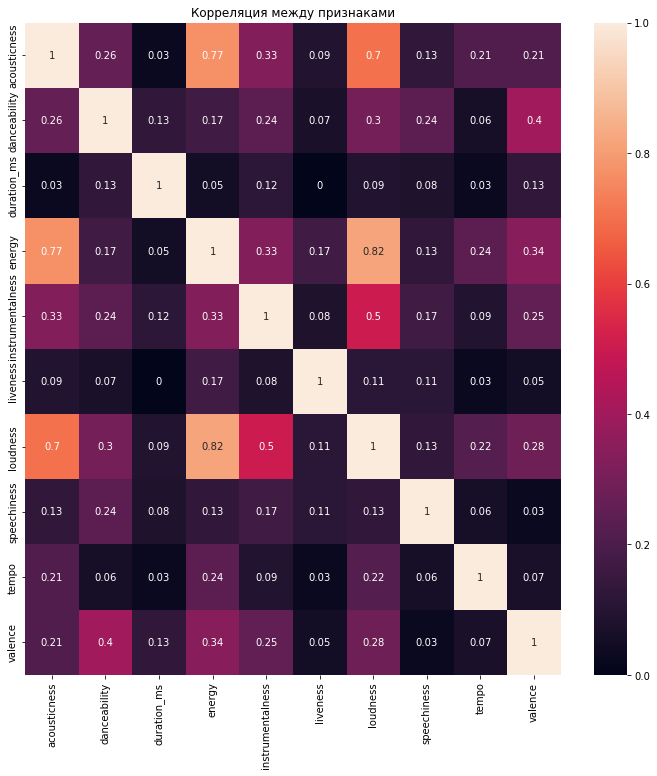

In [6]:
description(data_test)

### Выводы по результатам первичного анализа

- в **обучающем** датасете **20394** записи, в тестовом **5099**, состав признаков **одинаковый**
- в **обучающем** датасете 10 жанров музыки (целевой признак)
- в **тестовом** датасете отсутствует **целевой** признак
- в **обучающем** датасете есть 1 полный дубликат, в тестовом - 30 полных дубликатов
- есть **пропуски** данных в темпе, ладе и тональности в **обоих** датасетах
- заголовки датасетов **соответствуют** традиционному написанию
- имеются **недостоверные** (положительные) значения **громкости** в обоих датасетах
- имеются **недостоверные** (нулевые и отрицательные) значения **длительности** в обоих датасетах
- уникальные значения категориальных признаков лада `mode` и тональности `key` в обоих датасетах **совпадают**

- имеется **частичная мультиколлинеарность** (средняя и сильная корреляция) между признаками `energy`, `loudness` и `acousticness`, при этом `acousticness` имеет наилучшую корреляцию с **целевым** признаком

### Изучим, как распределяются признаки в зависимости от целевого признака

In [7]:
table = pd.pivot_table(data, index=['music_genre'], aggfunc= ("median"),
    values = [
    'acousticness', 
    'danceability',
    'duration_ms',
    'energy',
    'instrumentalness',
    'liveness',
    'loudness',
    'speechiness',
    'tempo',
    'valence'
    ])
table

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
music_genre,,,,,,,,,,
Alternative,0.03160,0.5450,219733.0,0.7500,0.000066,0.1350,-6.0350,0.05350,120.0480,0.434
Anime,0.05190,0.4830,231427.0,0.7980,0.000258,0.1390,-5.6190,0.04560,128.0020,0.435
Blues,0.21050,0.5290,220789.0,0.6350,0.000971,0.1410,-8.4175,0.04340,119.1180,0.586
Classical,0.96900,0.2960,243173.0,0.1000,0.837000,0.1110,-21.9570,0.04320,95.5235,0.139
Country,0.19050,0.5815,207305.0,0.6680,0.000001,0.1290,-6.4990,0.03410,121.9700,0.531
Electronic,0.02640,0.6310,236800.0,0.7705,0.178000,0.1275,-6.4060,0.05725,126.0000,0.361
Hip-Hop,0.10500,0.7380,206240.0,0.6520,0.000000,0.1370,-6.5830,0.19600,120.1000,0.465
Jazz,0.51600,0.5960,235467.0,0.4720,0.135000,0.1160,-10.4000,0.04380,105.3485,0.517
Rap,0.09605,0.7190,207573.5,0.6500,0.000000,0.1350,-6.3385,0.16200,120.0200,0.449


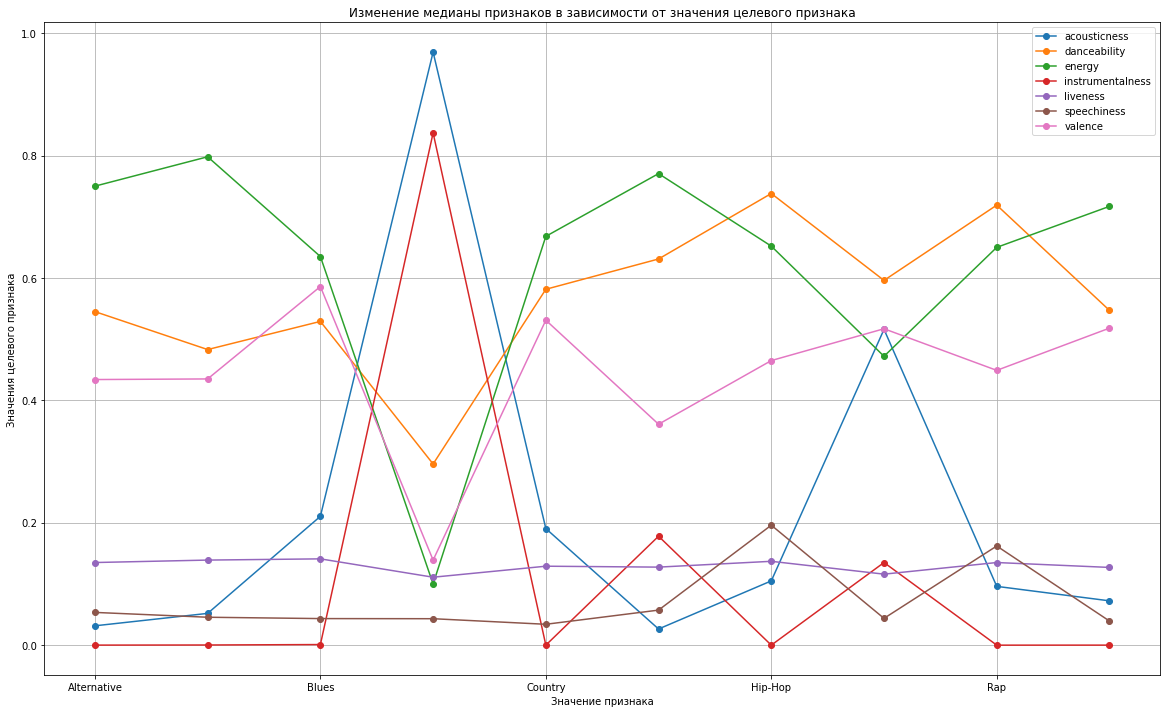

In [8]:
table.drop(['duration_ms', 'tempo', 'loudness'],
           axis = 1).plot(figsize = (20,12), 
                          grid = True,
                          marker = 'o');
plt.title('Изменение медианы признаков в зависимости от значения целевого признака');
plt.xlabel('Значение признака');
plt.ylabel('Значения целевого признака');

- наблюдается зачительное изменение **медианных** значений признаков **в зависимости от музыкального жанра**, за исключением признака `liveness`
- наиболее характерным набором медианных значений обладает **классическая** музыка

### Изучим балансировку классов в обучающей выборке

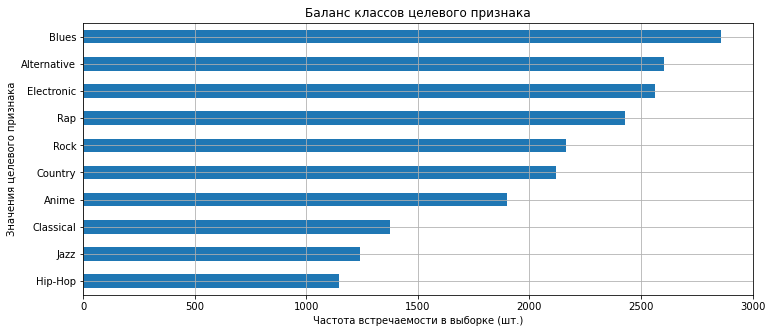

In [9]:
data['music_genre'].value_counts(ascending = True).plot(kind = 'barh',
                                                        figsize = (12, 5),
                                                        grid = True);
plt.title('Баланс классов целевого признака');
plt.xlabel('Частота встречаемости в выборке (шт.)');
plt.ylabel('Значения целевого признака');

- классы **не сбалансированы**, самый часто встречающийся класс - `Blues`, встречается почти в **три** раза чаще, чем самый редкий - `Hip-Hop`, что **необходимо учесть** при обучении

### Изучим выбросы в обучающей выборке

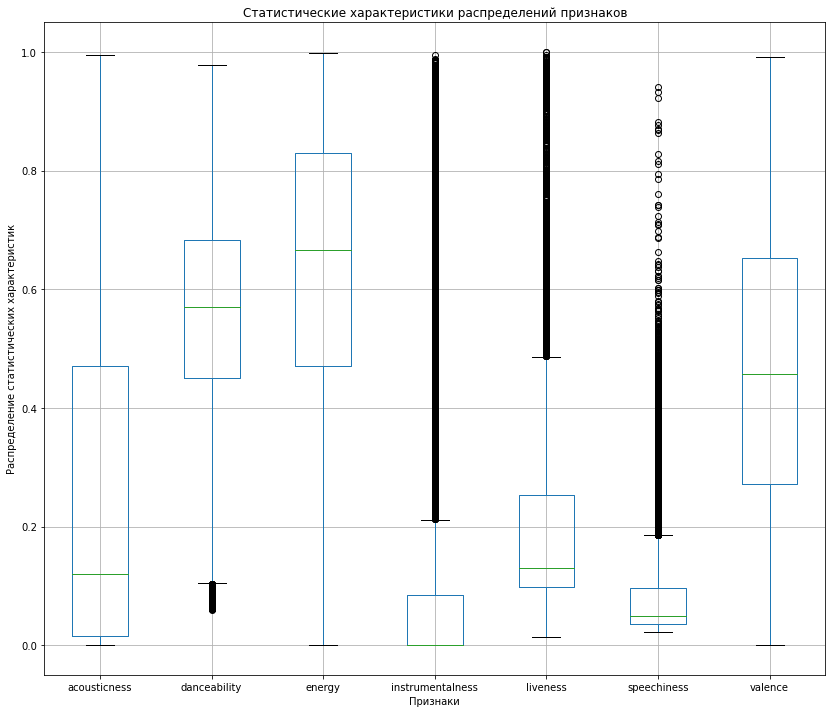

In [10]:
data.drop(['duration_ms', 'tempo', 'loudness'], axis = 1).boxplot(figsize = (14, 12), grid = True);
plt.title('Статистические характеристики распределений признаков');
plt.xlabel('Признаки');
plt.ylabel('Распределение статистических характеристик');

- имеются **многочисленные** выбросы в признаках, `instrumentalness`, `liveness`, `speechiness`, однако поскольку экстремальные значения позволяют определить ряд жанров, а количество выбросов сопоставимо с размерами выборки, удалять выбросы не будем

## Заполним пропущеные данные и обработаем недостоверные значения

### Объявим функцию, которая удалит неверные значения в числовых признаках и заполнит пропуски с помощью метода ближайших соседей, а пропуски в категориальных признаках заполнит значением `Unknown`

In [11]:
def filling_and_clearing(data):
    
    try:
        data['music_genre'].count()
        categorical = ['obtained_date', 'key', 'mode', 'track_name', 'music_genre']

        data = data.drop_duplicates()

        
    except:
        categorical = ['obtained_date', 'key', 'mode', 'track_name']
        
        
    data[['mode', 'key']] = data[['mode', 'key']].fillna('Unknown')
    
    tempo_median = data['tempo'].median()
    data.loc[data['tempo'].isna(), 'tempo'] = None 
        
    
    data.loc[(data['loudness'] >= 0), 'loudness'] = None 
    
    data.loc[(data['duration_ms'] <= 0), 'duration_ms'] = None
    
    data_isna_index = data.index
    
    imputer = KNNImputer()
    
    data_numerical = data.drop(categorical, axis = 1)

    filled_array = imputer.fit_transform(data_numerical)
    data_numerical = pd.DataFrame(imputer.fit_transform(data_numerical), 
                              index = data.index,
                              columns = data_numerical.columns)
    data.loc[data_isna_index, data_numerical.columns] = \
            data_numerical.loc[data_isna_index, data_numerical.columns]
    
    
    
    return data

In [12]:
data = filling_and_clearing(data)
print(data.shape)
display(data.head(3))
print('Пропусков данных:', data.isna().sum().sum())

(20393, 15)


,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
instance_id,,,,,,,,,,,,,,,
25143.0,Highwayman,0.480,0.670,182653.0,0.351,0.017600,D,0.115,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country
26091.0,Toes Across The Floor,0.243,0.452,187133.0,0.670,0.000051,A,0.108,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock
87888.0,First Person on Earth,0.228,0.454,173448.0,0.804,0.000000,E,0.181,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative


Пропусков данных: 0


### Результаты обработки исходных данных

- **пропущенные** значения в **категориальных** признаках `key` и `mode` заменены значениями `Unknown`
- **ошибочные** значения в признаках `duration_ms` и `loudness` **заменены** значением `None` (пропуск в данных) для последующего заполнения методом ближайших соседей
- **отсутствующие** (в т.ч. удаленные ошибочные) значения **заполнены** методом ближайших соседей (с использованием `KNNImputer`)
- **выбросы** не удалялись
- **дубликаты** удалялись только в обучающей выборке

### Создадим новые признаки из количественных данных

#### Объявим функцию, которая извлечет признак классической музыки из названия композиции по ключевым словам, характерным для классических произведений

In [13]:
def classic_determination(text):
   
    text = re.sub(r'-', ' ', text)
    
    classical = [' Op.', ' No.', ' Act ', 
    'Allegro', 'Andante', 'Adagio', 'Allegretto', 'Presto',
    ' Minor ', ' Major' ,
    ' in A ', ' in B ', ' in C ', ' in D ' , ' in E ', ' in F ', ' in G ']
    
    result = 0
    for item in classical:
        if item in text:
            result = 1

    return result

#### Объявим функцию, которая извлечет признак популярной (рок, поп, хип-хоп, рэп) музыки из наименования композиции по ключевым словам

In [14]:
def pop_determination(text):
    
    pop = ['feat.', 'Mix', 'Remix']
  
    result = 0
    for item in pop:
        if item in text:
            result = 1
            
    return result

#### Объявим функцию, которая извлечет признак анимэ из наименования композиции по наличию японских иероглифов

In [15]:
def an_determination(text):
    
   
    japan_alphabet = ['え', 'け', 'せ', 'て', 'ね', 'お', 'こ', 'そ', 'と', 'の', 'ふ', 'む', 'ゆ',
       'る', 'ん', 'へ', 'め', 'ほ', 'も', 'よ', 'ろ', 'を', 'れ', 'ゑ', 'あ', 'か',
       'さ', 'た', 'な', 'い', 'き', 'し', 'ち', 'に', 'う', 'く', 'す', 'つ', 'ぬ',
       'は', 'ま', 'や', 'ら', 'わ', 'ひ', 'み', 'り', 'ゐ', 'が', 'ぎ', 'ぐ', 'げ',
       'ご', 'ざ', 'じ', 'ず', 'ぜ', 'ぞ', 'だ', 'ぢ', 'づ', 'で', 'ど', 'ば', 'び',
       'ぶ', 'べ', 'ぼ', 'ぱ', 'ぴ', 'ぷ', 'ぺ', 'ぽ', 'ア', 'イ', 'ウ', 'エ', 'オ',
       'ハ', 'ヒ', 'フ', 'ヘ', 'ホ', 'カ', 'キ', 'ク', 'ケ', 'コ', 'マ', 'ミ', 'ム',
       'メ', 'モ', 'サ', 'シ', 'ス', 'セ', 'ソ', 'ヤ', 'ユ', 'ヨ', 'タ', 'チ', 'ツ',
       'テ', 'ト', 'ラ', 'リ', 'ル', 'レ', 'ロ', 'ナ', 'ニ', 'ヌ', 'ネ', 'ノ', 'ワ',
       'ヰ', 'ン', 'ヱ', 'ヲ', 'ガ', 'ギ', 'グ', 'ゲ', 'ゴ', 'ザ', 'ジ', 'ズ', 'ゼ',
       'ゾ', 'ダ', 'ヂ', 'ヅ', 'デ', 'ド', 'バ', 'ビ', 'ブ', 'ベ', 'ボ', 'パ', 'ピ',
       'プ', 'ペ', 'ポ', 'ティ', 'トゥ', 'テュ', 'ディ', 'ドゥ', 'デュ', '(ヷ)', '(ヸ)',
       'ヴ', '(ヹ)', '(ヺ)', 'ツァ', 'ツィ', 'ツェ', 'ツォ', 'ヴァ', 'ヴィ', 'ヴェ', 'ヴォ',
       'ヴャ', 'ファ', 'フィ', 'フェ', 'フォ', 'フュ', 'シェ', 'ジェ', 'チェ', 'イェ', 'ウィ',
       'ウェ', 'ウォ', '神', '様', '君', '警', '告', '風', '愛']
    
    result = 0
    for item in japan_alphabet:
        if item in text:
            result = 1
     
    return result

#### Объявим функцию, которая создаст новые признаки из количественных данных

In [16]:
def new_features(data):
    
    # Введем признак длины имени
    data.loc[:, 'name_len'] = data.loc[:, 
                'track_name'].apply(len)
                                     
    # Введем признак классичности
    data.loc[:, 'is_classical'] = data.loc[:,
                'track_name'].apply(classic_determination)
    
                                       
    # Введем признак анимашности
    data.loc[:, 'is_anime'] = data.loc[:, 
                'track_name'].apply(an_determination)
    
    # Введем признак рокопопсорэпа
    data.loc[:, 'is_pop'] = data.loc[:,
               'track_name'].apply(pop_determination)
    
    
    return data

#### Добавим в датасет новые синтетические признаки

In [17]:
data = new_features(data)
display(data.head(3))

,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,name_len,is_classical,is_anime,is_pop
instance_id,,,,,,,,,,,,,,,,,,,
25143.0,Highwayman,0.480,0.670,182653.0,0.351,0.017600,D,0.115,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country,10,0,0,0
26091.0,Toes Across The Floor,0.243,0.452,187133.0,0.670,0.000051,A,0.108,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock,21,0,0,0
87888.0,First Person on Earth,0.228,0.454,173448.0,0.804,0.000000,E,0.181,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative,21,0,0,0


In [18]:
data['name_len'].count()

20393

In [19]:
data['is_anime'].sum()

386

In [20]:
data['is_classical'].sum()

814

In [21]:
data['is_pop'].sum()

1585

#### В датасет включены следующие новые синтетические признаки, полученные из информации, содержащейся в названиях треков:
- `name_len` - длина наименования трека
- `is_classical` - в треке содержатся ключевые слова, характерные для классической музыки
- `is_anime` - в треке содержатся японские иероглифы
- `is_pop` - в треке содержатся слова, характерные для популярной музыки

## Создадим из `data` набор признаков и массив целевого признака

### Объявим функцию `features_maker`, которая будет удалять из датасета ненужные столбцы и присваивать категориальным признакам тип `category`

In [22]:
def features_maker(data):

    try:
        features = data.drop(['track_name', 'music_genre'], axis = 1)
    except:
        features = data.drop(['track_name'], axis = 1)

    cat_features = ['obtained_date',
                    'key',
                    'mode',
                    'is_classical',
                    'is_anime',
                    'is_pop'
                   ]
    

    features.loc[:, cat_features] = \
    features.loc[:, cat_features].astype('category')
    #print(features[cat_features].info())
    
    return features

### Создадим массив признаков и массив целевого признака

In [23]:
features = features_maker(data)

display(features.head(3))
print(features.shape)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,name_len,is_classical,is_anime,is_pop
instance_id,,,,,,,,,,,,,,,,,
25143.0,0.480,0.670,182653.0,0.351,0.017600,D,0.115,-16.842,Major,0.0463,101.384,4-Apr,0.450,10,0,0,0
26091.0,0.243,0.452,187133.0,0.670,0.000051,A,0.108,-8.392,Minor,0.0352,113.071,4-Apr,0.539,21,0,0,0
87888.0,0.228,0.454,173448.0,0.804,0.000000,E,0.181,-5.225,Minor,0.3710,80.980,4-Apr,0.344,21,0,0,0


(20393, 17)


In [24]:
target = data['music_genre']
print(target.head(), target.shape)

instance_id
25143.0        Country
26091.0           Rock
87888.0    Alternative
77021.0        Hip-Hop
20852.0    Alternative
Name: music_genre, dtype: object (20393,)


- созданы массив признаков и массив целевого признака для обучения моделей

## Обучим модели

### Объявим функцию, рассчитывающую метрику `f1_micro`, и определим ее в качестве метрики качества в обучаемых моделях

In [25]:
def micro (y_true, y_pred):

    return f1_score(y_true, y_pred, average='micro')

In [26]:
f1_micro = make_scorer(micro)
f1_micro

make_scorer(micro)

In [27]:
print(micro(target, target))
f1_score(target, target,  average='micro')

1.0


1.0

### Обучим и протестируем модель `LogisticRegression` методом `кросс-валидации`

#### Зададим неизменяемые гиперпараметры модели

In [28]:
lr = LogisticRegression(
    solver = 'lbfgs', 
    random_state = 53,
    #class_weight = 'balanced',
    n_jobs = -1, 
    max_iter = 1000
)

#### Зададим функцию, балансирующую классы

In [29]:
balancer = SMOTE(random_state=53)

#### Зададим трансформер столбцов  и упакуем в него кодировщики

In [30]:
lr_column_transformer = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include='number')),
    #(PolynomialFeatures(), make_column_selector(dtype_include='number')),
    #(MinMaxScaler(), make_column_selector(dtype_include='number')),
    
    (OneHotEncoder(drop='first', handle_unknown='ignore'), make_column_selector(dtype_include='category')),
    #(OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1),
    #make_column_selector(dtype_include='category')),

    remainder='passthrough')

#### Объявим шаги, которые будут исполняться в `Pipline`

In [31]:
lr_pipe = Pipeline(steps=[
    
    ("lr_column_transformer", lr_column_transformer),
    #("balancer", balancer),
    ("lr", lr)])
lr_pipe

Pipeline(steps=[('lr_column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fcafa680>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fcaf9570>)])),
                ('lr',
                 LogisticRegression(max_iter=1000, n_jobs=-1,
                                    random_state=53))])

#### Зададим диапазоны гиперпараметров для поиска оптимальной метрики `f1` методом `кросс-валидации`

In [32]:
lr_param_grid = {
    
    "lr__C" : [0.3] #[0.1, 0.2, 0.3, 0.4, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    
}

#### Объявим функцию поиска оптимальных гиперпараметров

In [33]:
lr_search = GridSearchCV(
    lr_pipe, 
    lr_param_grid,
    #n_jobs= -1,
    scoring = 'f1_micro',
    cv = 5,
    verbose = 0
)

#### Проведем поиск оптимальных гиперпараметров

In [34]:
lr_search.fit(features, target)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('lr_column_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fcafa680>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fcaf9570>)])),
                                       ('lr',
                                        LogisticRegression(max_iter=1000,
                                                           n_jobs=-1,
                                                           random_state=53))]),
             param_grid={'lr__C': [0.3]}, scoring='f1_micro')

In [35]:
print("\nЛучшее полученное методом кросс-валидации \n \
значение метрики f1-micro = %0.4f:" % lr_search.best_score_,
"найдено при следующих параметрах")
print(lr_search.best_params_)


Лучшее полученное методом кросс-валидации 
 значение метрики f1-micro = 0.4365: найдено при следующих параметрах
{'lr__C': 0.3}


- Лучшее полученное методом кросс-валидации значение метрики f1-micro = 0.4365 не удовлетворительно, **отказываемся** от использования указанной модели

### Обучим и протестируем модель `HistGradientBoostingClassifier` методом `кросс-валидации`

#### Зададим неизменяемые гиперпараметры модели

In [36]:
hgbc = HistGradientBoostingClassifier(
   
    verbose=0,
    random_state=53
)

#### Зададим функцию, балансирующую классы

In [37]:
balancer = SMOTE(random_state=53)

#### Зададим трансформер столбцов  и упакуем в него кодировщики

In [38]:
hgbc_column_transformer = make_column_transformer(
     
    #(PolynomialFeatures(), make_column_selector(dtype_include='number')),
    (StandardScaler(), make_column_selector(dtype_include='number')),
    #(MinMaxScaler(), make_column_selector(dtype_include='number')),
 
    
    (OneHotEncoder(drop='first', handle_unknown='ignore'), make_column_selector(dtype_include='category')),
   #(OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1),
   # make_column_selector(dtype_include='category')),

    remainder='passthrough')

#### Объявим шаги, которые будут исполняться в `Pipline`

In [39]:
hgbc_pipe = Pipeline(steps=[
    
    ("hgbc_column_transformer", hgbc_column_transformer),
    #("balancer", balancer),
    ("hgbc", hgbc)])
hgbc_pipe

Pipeline(steps=[('hgbc_column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbf9a950>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbf99630>)])),
                ('hgbc', HistGradientBoostingClassifier(random_state=53))])

#### Зададим диапазоны гиперпараметров для поиска оптимальной метрики `f1` методом `кросс-валидации`

In [40]:
hgbc_param_grid = {
    
    "hgbc__learning_rate": [0.031], #[0.028, 0.029, 0.03, 0.031, 0.032, 0.027, 0.033, 0.026, 0.025],
    "hgbc__max_iter": [97], #[20, 50, 80, 100, 120, 200],
    "hgbc__max_depth": [6],
    "hgbc__max_leaf_nodes": [30],
    "hgbc__min_samples_leaf": [20], 
    "hgbc__l2_regularization": [0.0],
    
}

#### Объявим функцию поиска оптимальных гиперпараметров

In [41]:
hgbc_search = GridSearchCV(
    hgbc_pipe, 
    hgbc_param_grid,
    #n_jobs= -1,
    scoring = 'f1_micro',
    cv = 5,
    verbose = 1
)

#### Проведем поиск оптимальных гиперпараметров

In [42]:
hgbc_search.fit(features, target)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('hgbc_column_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbf9a950>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbf99630>)])),
                                       ('hgbc',
                                        HistGradientBoostingClassifier(random_state=53))]),
             param_grid={'hgbc__l2_regularization': [0.0],
                         'hgbc__learning_rate': [0.031], 'hgbc__max_depth': [6],
                         'hgbc__max_iter': [97], 'hgbc__max_leaf_nodes': [30],
                         'hgbc__min_samples_leaf': [20]},
             scoring='f1_micro', verbose=1)

In [43]:
print("\nЛучшее полученное методом кросс-валидации \n \
значение метрики f1-micro = %0.4f:" % hgbc_search.best_score_,
"найдено при следующих параметрах")
print(hgbc_search.best_params_)


Лучшее полученное методом кросс-валидации 
 значение метрики f1-micro = 0.4945: найдено при следующих параметрах
{'hgbc__l2_regularization': 0.0, 'hgbc__learning_rate': 0.031, 'hgbc__max_depth': 6, 'hgbc__max_iter': 97, 'hgbc__max_leaf_nodes': 30, 'hgbc__min_samples_leaf': 20}


### Обучим и протестируем модель `RandomForestClassifier` методом `кросс-валидации`

#### Зададим неизменяемые гиперпараметры модели

In [44]:
rfc = RandomForestClassifier(
                       n_jobs=-1,
                       random_state=53, 
                       verbose=0,
                       #warm_start=True,
                       #class_weight='balanced',
                       )

#### Зададим трансформер столбцов  и упакуем в него кодировщики

In [45]:
rfc_column_transformer = make_column_transformer(
    
    #(PolynomialFeatures(), make_column_selector(dtype_include='number')),
    (StandardScaler(), make_column_selector(dtype_include='number')),
    #(MinMaxScaler(), make_column_selector(dtype_include='number')),
    
    (OneHotEncoder(drop='first', handle_unknown='ignore'), make_column_selector(dtype_include='category')),
   # (OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1),
    # make_column_selector(dtype_include='category')),

    remainder='passthrough')
rfc_column_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbf9a710>),
                                ('onehotencoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbf9b700>)])

#### Объявим шаги, которые будут исполняться в `Pipline`

In [46]:
rfc_pipe = Pipeline(steps=[
    ("rfc_column_transformer", rfc_column_transformer),
    #("balancer", balancer),
    ("rfc", rfc)])
rfc_pipe

Pipeline(steps=[('rfc_column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbf9a710>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbf9b700>)])),
                ('rfc', RandomForestClassifier(n_jobs=-1, random_state=53))])

#### Зададим диапазоны гиперпараметров для поиска оптимальной метрики `f1` методом `кросс-валидации`

In [47]:
rfc_param_grid = {
    
    "rfc__n_estimators" : [276], #[276]
    "rfc__max_depth" : [31], # [31]
    "rfc__min_samples_leaf" : [9], # [9]
    #"rfc__min_samples_split" : [2],
    # "rfc__min_weight_fraction_leaf" : [0.0],
    # "rfc__ccp_alpha" : [0.0]
}

#### Объявим функцию поиска оптимальных гиперпараметров

In [48]:
rfc_search = GridSearchCV(
    rfc_pipe, 
    rfc_param_grid,
    scoring = 'f1_micro',
    cv = 5,
    verbose = 1
)

#### Проведем поиск оптимальных гиперпараметров

In [49]:
rfc_search.fit(features, target)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rfc_column_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbf9a710>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbf9b700>)])),
                                       ('rfc',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=53))]),
             param_grid={'rfc__max_depth': [31], 'rfc__min_samples_leaf': [9],
                         'rfc__n_estimators': [276]},
             scoring='f1_micro', verbose=1)

In [50]:
print("\nЛучшее полученное методом кросс-валидации \n \
значение метрики f1-micro = %0.4f:" % rfc_search.best_score_,
"найдено при следующих параметрах")
print(rfc_search.best_params_)


Лучшее полученное методом кросс-валидации 
 значение метрики f1-micro = 0.4969: найдено при следующих параметрах
{'rfc__max_depth': 31, 'rfc__min_samples_leaf': 9, 'rfc__n_estimators': 276}


### Обучим модель `LGBMClassifier`

#### Зададим неизменяемые гиперпараметры модели

In [51]:
lgb = LGBMClassifier(
    random_state = 270923,
    n_jobs = 4,
    verbose = 0,
    #class_weight = 'balanced',
    force_row_wise=True
)

#### Зададим энкодеры и трансформеры

In [52]:
lgb_column_transformer = make_column_transformer(
    (PolynomialFeatures(), make_column_selector(dtype_include='number')),
    (MinMaxScaler(), make_column_selector(dtype_include='number')),
    #(StandardScaler(), make_column_selector(dtype_include='number')),

    
    (OneHotEncoder(drop='first', handle_unknown='ignore'), make_column_selector(dtype_include='category')),
    #(OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1),
     #make_column_selector(dtype_include='category')),

    remainder='passthrough')
lgb_column_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('polynomialfeatures', PolynomialFeatures(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbf9a260>),
                                ('minmaxscaler', MinMaxScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbf9a650>),
                                ('onehotencoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbf99c30>)])

#### Объявим шаги, которые будут исполняться в `Pipline`

In [53]:
lgb_pipe = Pipeline(steps=[
    ("lgb_column_transformer", lgb_column_transformer),
    #("balancer", balancer),
    ("lgb", lgb)])
lgb_pipe

Pipeline(steps=[('lgb_column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('polynomialfeatures',
                                                  PolynomialFeatures(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbf9a260>),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbf9a650>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbf99c30>)])),
                ('lgb',
                 LGBMClassifier(force_row_wise=True, n_jobs=4,
                                random_state=270923, verbose=0))])

#### Зададим диапазоны гиперпараметров для поиска оптимальной метрики `f1-micro` методом `кросс-валидации`

In [54]:
lgb_param_grid = {
       # 'polynominal_featurer__degree': [4],
        'lgb__learning_rate': [0.12],
        'lgb__n_estimators': [55], #range(1, 20, 2),
        'lgb__max_depth': [5],
        'lgb__num_leaves': [10], # range(20, 20, 1),
        'lgb__min_child_samples': [20] #, 5, 10] # 2 [2 - 50]
    }

#### Объявим функцию `GridSearchCV` для поиска оптимальных гиперпараметров

In [55]:
lgb_search = GridSearchCV(
                 lgb_pipe, 
                 lgb_param_grid, 
                 cv = 5, 
                 #n_jobs = -1,
                 scoring = 'f1_micro',
                 verbose = 1)

#### Проведем поиск оптимальных гиперпараметров

In [56]:
lgb_search.fit(features, target)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('lgb_column_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('polynomialfeatures',
                                                                         PolynomialFeatures(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbf9a260>),
                                                                        ('minmaxscaler',
                                                                         MinMaxScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7...
                                                                                       handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbf99c30>)])),
                                       ('lgb',
                                        LGBMClassifier(force_row_wise=True,
                                                       n_jobs=4,
                                                       random_state=270923,
                                                       verbose=0))]),
             param_grid={'lgb__learning_rate': [0.12], 'lgb__max_depth': [5],
                         'lgb__min_child_samples': [20],
                         'lgb__n_estimators': [55], 'lgb__num_leaves': [10]},
             scoring='f1_micro', verbose=1)

In [57]:
print("\n Лучшее полученное методом кросс-валидации \n \
значение метрики f1-micro = %0.4f:" % lgb_search.best_score_,
"найдено при следующих гиперпараметрах\n")
print(lgb_search.best_params_)


 Лучшее полученное методом кросс-валидации 
 значение метрики f1-micro = 0.4987: найдено при следующих гиперпараметрах

{'lgb__learning_rate': 0.12, 'lgb__max_depth': 5, 'lgb__min_child_samples': 20, 'lgb__n_estimators': 55, 'lgb__num_leaves': 10}


### Обучим модель `CatBoost`

#### Зададим неизменяемые гиперпараметры модели

In [58]:
cb = CatBoostClassifier(
    random_seed = 53,
    verbose=False
)

#### Зададим энкодеры и трансформеры

In [59]:
cb_column_transformer = make_column_transformer(
    
    #(PolynomialFeatures(), make_column_selector(dtype_include='number')),
    (MinMaxScaler(), make_column_selector(dtype_include='number')),
    #(StandardScaler(), make_column_selector(dtype_include='number')),
    
    (OneHotEncoder(drop='first', handle_unknown='ignore'), make_column_selector(dtype_include='category')),
    #(OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1),
    # make_column_selector(dtype_include='category')),

    remainder='passthrough')

#### Объявим шаги, которые будут исполняться в `Pipline`

In [60]:
cb_pipe = Pipeline(steps=[
    ("cb_column_transformer", cb_column_transformer),
    #("balancer", balancer),
    ("cb", cb)])
cb_pipe

Pipeline(steps=[('cb_column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbe31540>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbe31060>)])),
                ('cb',
                 <catboost.core.CatBoostClassifier object at 0x7ff1fbe32d70>)])

#### Зададим диапазоны гиперпараметров для поиска оптимальной метрики `f1-micro` методом `кросс-валидации`

In [61]:
cb_param_grid = {
   
        'cb__learning_rate': [0.19],
        'cb__iterations': [95], #29
        'cb__depth': [6], # range(2, 6, 1) тестил от 1 до 11# 12 
        #'cb__max_leaves': [31]
        #'cb__min_data_in_leaf': [1],
        #'cb__l2_leaf_reg': [3]
      
    }

#### Объявим функцию `GridSearchCV` для поиска оптимальных гиперпараметров

In [62]:
cb_search = GridSearchCV(
                 cb_pipe, 
                 cb_param_grid, 
                 cv = 5, 
                 #n_jobs = -1,
                 scoring = 'f1_micro',
                 verbose = 1)

#### Проведем поиск оптимальных гиперпараметров

In [63]:
cb_search.fit(features, target)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cb_column_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('minmaxscaler',
                                                                         MinMaxScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbe31540>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbe31060>)])),
                                       ('cb',
                                        <catboost.core.CatBoostClassifier object at 0x7ff1fbe32d70>)]),
             param_grid={'cb__depth': [6], 'cb__iterations': [95],
                         'cb__learning_rate': [0.19]},
             scoring='f1_micro', verbose=1)

In [64]:
print("\nЛучшее полученное методом кросс-валидации \n \
значение метрики f1-micro = %0.4f:" % cb_search.best_score_,
"найдено при следующих гиперпараметрах")
print(cb_search.best_params_)


Лучшее полученное методом кросс-валидации 
 значение метрики f1-micro = 0.5016: найдено при следующих гиперпараметрах
{'cb__depth': 6, 'cb__iterations': 95, 'cb__learning_rate': 0.19}


### Включим в `стековую` модель `StackingClassifier` лучшие модели для осуществления наиболее точного прогнозирования жанра музыкалькой композиции путем сравнения прогнозов моделей

In [65]:
estimators = [
            #('lr', lr_pipe),
            #('hgbc', hgbc_pipe),
            ('rfc', rfc_pipe),
            ('cb', cb_pipe),
            ('lgb', lgb_pipe)
             ]


clf = StackingClassifier(estimators=estimators, 
                         final_estimator = LogisticRegression(random_state=53,
                                                             max_iter = 10000),
                         cv = 5, 
                         verbose=1
                         )

clf

StackingClassifier(cv=5,
                   estimators=[('rfc',
                                Pipeline(steps=[('rfc_column_transformer',
                                                 ColumnTransformer(remainder='passthrough',
                                                                   transformers=[('standardscaler',
                                                                                  StandardScaler(),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbf9a710>),
                                                                                 ('onehotencoder',
                                                                                  OneHotEncoder(drop='first',
                                                                                                handle_unknown='ignore'),
                                                                                  <sklearn.compose._colum...
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbf9a650>),
                                                                                 ('onehotencoder',
                                                                                  OneHotEncoder(drop='first',
                                                                                                handle_unknown='ignore'),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbf99c30>)])),
                                                ('lgb',
                                                 LGBMClassifier(force_row_wise=True,
                                                                n_jobs=4,
                                                                random_state=270923,
                                                                verbose=0))]))],
                   final_estimator=LogisticRegression(max_iter=10000,
                                                      random_state=53),
                   verbose=1)

## Проверим стекинговую  модель `StackingClassifier` на выделеной из обучающего датасета тестовой выборке

### Выделим из обучающего датасета обучающую и стратифицированную тестовую выборку

In [66]:
features = features_maker(data)

display(features.head(3))
features.shape

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,name_len,is_classical,is_anime,is_pop
instance_id,,,,,,,,,,,,,,,,,
25143.0,0.480,0.670,182653.0,0.351,0.017600,D,0.115,-16.842,Major,0.0463,101.384,4-Apr,0.450,10,0,0,0
26091.0,0.243,0.452,187133.0,0.670,0.000051,A,0.108,-8.392,Minor,0.0352,113.071,4-Apr,0.539,21,0,0,0
87888.0,0.228,0.454,173448.0,0.804,0.000000,E,0.181,-5.225,Minor,0.3710,80.980,4-Apr,0.344,21,0,0,0


(20393, 17)

In [67]:
target = data['music_genre']
print(target.head(3))
print(target.shape)

instance_id
25143.0        Country
26091.0           Rock
87888.0    Alternative
Name: music_genre, dtype: object
(20393,)


In [68]:
features_train, features_test, \
target_train, target_test = train_test_split(features, target, 
                            random_state = 270923,
                            shuffle = True,
                            test_size = 0.25,
                            stratify=target)

In [69]:
display(features_train.shape,
        round(features_train.shape[0]/data.shape[0], 2),
        features_test.shape,
        round(features_test.shape[0]/data.shape[0], 2))
display(target_train.shape, target_test.shape)

(15294, 17)

0.75

(5099, 17)

0.25

(15294,)

(5099,)

- из обучающего датасета выделены обучающая и тестовая выборки в пропорции 75% и 25%

### Обучим стекинговую модель на выделенной обучающей выборке и проверим на тестовой выборке

In [70]:
clf

StackingClassifier(cv=5,
                   estimators=[('rfc',
                                Pipeline(steps=[('rfc_column_transformer',
                                                 ColumnTransformer(remainder='passthrough',
                                                                   transformers=[('standardscaler',
                                                                                  StandardScaler(),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbf9a710>),
                                                                                 ('onehotencoder',
                                                                                  OneHotEncoder(drop='first',
                                                                                                handle_unknown='ignore'),
                                                                                  <sklearn.compose._colum...
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbf9a650>),
                                                                                 ('onehotencoder',
                                                                                  OneHotEncoder(drop='first',
                                                                                                handle_unknown='ignore'),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbf99c30>)])),
                                                ('lgb',
                                                 LGBMClassifier(force_row_wise=True,
                                                                n_jobs=4,
                                                                random_state=270923,
                                                                verbose=0))]))],
                   final_estimator=LogisticRegression(max_iter=10000,
                                                      random_state=53),
                   verbose=1)

In [71]:
clf.fit(features_train, target_train)
clf_predictions_test = clf.predict(features_test)

In [72]:
clf_f1_score = f1_score(target_test, clf_predictions_test, average = 'micro')
print("\nЗначение метрики f1-micro на тестовой выборке: %0.4f" % clf_f1_score, '\n')


Значение метрики f1-micro на тестовой выборке: 0.5260 



In [73]:
print(classification_report(target_test, clf_predictions_test))

              precision    recall  f1-score   support

 Alternative       0.35      0.40      0.37       651
       Anime       0.65      0.65      0.65       475
       Blues       0.46      0.58      0.51       715
   Classical       0.91      0.80      0.86       343
     Country       0.49      0.55      0.52       530
  Electronic       0.65      0.72      0.68       641
     Hip-Hop       0.60      0.12      0.20       286
        Jazz       0.49      0.32      0.39       310
         Rap       0.53      0.73      0.62       607
        Rock       0.33      0.16      0.21       541

    accuracy                           0.53      5099
   macro avg       0.55      0.50      0.50      5099
weighted avg       0.53      0.53      0.51      5099



 - отчет показывает, что наилучшую точность прогнозирования и охват выборки модель показывает на **классической** музыке
 - на втором месте находится жанр **электронной** музыки,
 - на третьем - **анимэ**
 - на четвертом - **рэп**, затем **кантри**
 - хуже всех модель распознает **хип-хоп** и **рок**, которые имеют сходные акустические характеристики и для которых не удалось создать индивидуальные искусственные признаки

### Проверим стекинговую модель на адекватность

#### Проверка модели на адекватность путем сравнения метрики `f1` прогноза, полученного на тестовой выборке, с фиктивным прогнозом

In [74]:
dummy_model = DummyClassifier()

In [75]:
dummy_model.fit(features_train, target_train)
dummy_predict = dummy_model.predict(features_test)
f1_dummy = f1_score(target_test, dummy_predict, average = 'micro')
print("Метрика f1 фиктивной модели: %0.2f" % f1_dummy)

Метрика f1 фиктивной модели: 0.14


- выбранная модель **адекватна**

## Обучим модель на полной выборке и создадим прогноз для финального тестирования

### Заполним пропуски в данных тестового датасета и обработаем ошибочные значения, аналогично обучающему датасету

In [76]:
data_test = filling_and_clearing(data_test)
print(data_test.shape)
display(data_test.head(3))
print('Пропусков данных:', data_test.isna().sum().sum())

(5099, 14)


,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
instance_id,,,,,,,,,,,,,,
48564,Low Class Conspiracy,0.30100,0.757,146213.0,0.679,0.00000,A#,0.3030,-7.136,Minor,0.3560,90.361,4-Apr,0.895
72394,The Hunter,0.53800,0.256,240360.0,0.523,0.00832,G#,0.0849,-5.175,Major,0.0294,78.385,4-Apr,0.318
88081,Hate Me Now,0.00583,0.678,284000.0,0.770,0.00000,A,0.1090,-4.399,Minor,0.2220,90.000,4-Apr,0.412


Пропусков данных: 0


### Введем новые признаки в тестовый датасет, аналогично обучающему

In [77]:
data_test = new_features(data_test)
data_test.head(3)

,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,name_len,is_classical,is_anime,is_pop
instance_id,,,,,,,,,,,,,,,,,,
48564,Low Class Conspiracy,0.30100,0.757,146213.0,0.679,0.00000,A#,0.3030,-7.136,Minor,0.3560,90.361,4-Apr,0.895,20,0,0,0
72394,The Hunter,0.53800,0.256,240360.0,0.523,0.00832,G#,0.0849,-5.175,Major,0.0294,78.385,4-Apr,0.318,10,0,0,0
88081,Hate Me Now,0.00583,0.678,284000.0,0.770,0.00000,A,0.1090,-4.399,Minor,0.2220,90.000,4-Apr,0.412,11,0,0,0


### Создадим обучающую выборку из всего обучающего датасета

In [78]:
features_train = features_maker(data)

display(features_train.head(3))
print(features_train.shape)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,name_len,is_classical,is_anime,is_pop
instance_id,,,,,,,,,,,,,,,,,
25143.0,0.480,0.670,182653.0,0.351,0.017600,D,0.115,-16.842,Major,0.0463,101.384,4-Apr,0.450,10,0,0,0
26091.0,0.243,0.452,187133.0,0.670,0.000051,A,0.108,-8.392,Minor,0.0352,113.071,4-Apr,0.539,21,0,0,0
87888.0,0.228,0.454,173448.0,0.804,0.000000,E,0.181,-5.225,Minor,0.3710,80.980,4-Apr,0.344,21,0,0,0


(20393, 17)


In [79]:
target_train = data['music_genre']
print(target.head(), target.shape)

instance_id
25143.0        Country
26091.0           Rock
87888.0    Alternative
77021.0        Hip-Hop
20852.0    Alternative
Name: music_genre, dtype: object (20393,)


### Создадим тестовую выборку из тестового датасета

In [80]:
features_test = features_maker(data_test)

display(features_test.head(3))
print(features_test.shape)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,name_len,is_classical,is_anime,is_pop
instance_id,,,,,,,,,,,,,,,,,
48564,0.30100,0.757,146213.0,0.679,0.00000,A#,0.3030,-7.136,Minor,0.3560,90.361,4-Apr,0.895,20,0,0,0
72394,0.53800,0.256,240360.0,0.523,0.00832,G#,0.0849,-5.175,Major,0.0294,78.385,4-Apr,0.318,10,0,0,0
88081,0.00583,0.678,284000.0,0.770,0.00000,A,0.1090,-4.399,Minor,0.2220,90.000,4-Apr,0.412,11,0,0,0


(5099, 17)


### Обучим стекинговую модель на полной обучающей выборке и осуществим предсказание на тестовой

In [81]:
clf.fit(features_train, target_train)
clf_predictions_test = clf.predict(features_test)

In [82]:
clf_predictions_test

array(['Rap', 'Rock', 'Rap', ..., 'Rap', 'Electronic', 'Blues'],
      dtype=object)

### Создадим по образцу файл с прогнозом и запишем его на диск для отправки на тестирование

In [83]:
example['music_genre'] = clf_predictions_test
display(example.head(), example.shape)

,music_genre
instance_id,
48564,Rap
72394,Rock
88081,Rap
78331,Country
72636,Alternative


(5099, 1)

- формат прогноза **соответствует** требованиям

#### Запишем на диск и отправим на проверку

In [84]:
example.to_csv('zhukov_prediction_clf_15.csv')

#### Модель, получившая результат, отправленный на финальное тестирование

In [85]:
clf

StackingClassifier(cv=5,
                   estimators=[('rfc',
                                Pipeline(steps=[('rfc_column_transformer',
                                                 ColumnTransformer(remainder='passthrough',
                                                                   transformers=[('standardscaler',
                                                                                  StandardScaler(),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbf9a710>),
                                                                                 ('onehotencoder',
                                                                                  OneHotEncoder(drop='first',
                                                                                                handle_unknown='ignore'),
                                                                                  <sklearn.compose._colum...
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbf9a650>),
                                                                                 ('onehotencoder',
                                                                                  OneHotEncoder(drop='first',
                                                                                                handle_unknown='ignore'),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1fbf99c30>)])),
                                                ('lgb',
                                                 LGBMClassifier(force_row_wise=True,
                                                                n_jobs=4,
                                                                random_state=270923,
                                                                verbose=0))]))],
                   final_estimator=LogisticRegression(max_iter=10000,
                                                      random_state=53),
                   verbose=1)

### Результаты проверки прогноза, сделанного на тестовом датасете

- значение метрики `f1-micro`, полученной на прогнозе, сделанном на тестовом датасете, составляет **0.52608**, что **соответствует** метрике модели, полученной методом `кросс-валидации`, и метрике, полученой на выделенной из обучающего датасета тестовой выборке, т.е. модель **не переобучена**

## Отчет

### Описание задачи

Музыкальный стриминговый сервис "МиФаСоль" расширяет работу с новыми артистами и музыкантами, в связи с чем необходимо правильно классифицировать новые музыкальные треки на основе некоторых их характеристик, чтобы улучшить работу рекомендательной системы. 

**Задача** - разработать модель, позволяющую **классифицировать музыкальные произведения по жанрам**. Для каждого трека нужно предсказать категориальное значение, соответствующее музыкальному жанру трека.

### Результаты исследования исходных данных

- в **обучающем** датасете **20394** записи, в тестовом **5099**, состав признаков **одинаковый**
- в **обучающем** датасете 10 жанров музыки (целевой признак)
- в **тестовом** датасете отсутствует **целевой** признак
- в **обучающем** датасете есть 1 полный дубликат, в тестовом - 30 полных дубликатов
- есть **пропуски** данных в темпе, ладе и тональности в **обоих** датасетах
- заголовки датасетов **соответствуют** традиционному написанию
- имеются **недостоверные** (положительные) значения **громкости** в обоих датасетах
- имеются **недостоверные** (нулевые и отрицательные) значения **длительности** в обоих датасетах
- уникальные значения категориальных признаков лада `mode` и тональности `key` в обоих датасетах **совпадают**

- имеется **частичная мультиколлинеарность** (средняя и сильная корреляция) между признаками `energy`, `loudness` и `acousticness`, при этом `acousticness` имеет наилучшую корреляцию с **целевым** признаком

- наблюдается зачительное изменение **медианных** значений признаков **в зависимости от музыкального жанра**, за исключением признака `liveness`
- наиболее характерным набором медианных значений обладает **классическая** музыка

- классы **не сбалансированы**, самый часто встречающийся класс - `Blues`, встречается почти в **три** раза чаще, чем самый редкий - `Hip-Hop`

- имеются **многочисленные** выбросы в признаках `danceability`, `instrumentalness`, `liveness`, `speechiness`, удаление которых приведет к значительному сокращению репрезентативности выборки

### Проведена следующая предобработка исходных данных (в обучающей и тестовой выборках)

- **пропущенные** значения в **категориальных** признаках `key` и `mode` заменены значениями `Unknown`
- **ошибочные** значения в признаках `duration_ms` и `loudness` **заменены** значением `None` (пропуск в данных) для последующего заполнения методом ближайших соседей
- **отсутствующие** (в т.ч. удаленные ошибочные) значения **заполнены** методом ближайших соседей (с использованием `KNNImputer`)
- **выбросы** не удалялись
- **дубликаты** удалялись только в обучающей выборке

### В датасет включены следующие новые синтетические признаки, полученные из информации, содержащейся в названиях треков:
- `name_len` - длина наименования трека
- `is_classical` - в треке содержатся ключевые слова, характерные для классической музыки
- `is_anime` - в треке содержатся японские иероглифы
- `is_pop` - в треке содержатся слова, характерные для популярной музыки

### Обучение моделей

- Для решения задачи были обучены и проверены методом кросс-валидации следующие модели:
    - `LogisticRegression`
    - `HistGradientBoostingClassifier`
    - `RandomForestClassifier`
    - `LGBMClassifier`
    - `CatBoostClassifier`
    
Для каждой модели был собран отдельный `Pipeline`, включающий в себя в зависимости от модели `PolynominalFeatures`, `StandartScaler`, `MinMaxScaler` для количественных признаков, и `OrdinalEncoder` или `OneHotEncoder` для категориальных. Для каждой модели был подобран оптимальный набор трансформеров, при которых с помощью перебора гиперпараметров в `GridSearchCV` методом кросс-валидации были достигнуты наилучшие показатели метрики `f1-micro`

Все модели обучались и проверялись с использованием балансировки классов, и без балансировки, при этом для балансировки использовались как собственные возможности моделей, так и балансировка с использованием функции `SMOTE` библиотеки `imbalanced-learn`. Полученные методом кросс-валидации метрики с балансировкой оказались значительно хуже метрик без балансировки, было принято решение от **балансировки классов отказаться**. Был проведен один тест на тестовом датасете с балансировкой классов, результат оказался **хуже** лучшего результата без балансировки классов


Все модели, за исключением  `LogisticRegression`, показали значение метрики `f1-micro` на уровне 49.4 - 50.2


- **Три лучшие** модели были объединены в стекинговую модель `StackingClassifier`, прогноз которой и был использован для получения финального тестирования на тестовой выборке. Было проведено несколько тестов с различным составом моделей, входящих в стекинговую модель, лучшим составом является следующий состав:
    - `RandomForestClassifier` со следующими гиперпараметрами:
       - StandardScaler, OneHotEncoder
       - rfc__max_depth: 31,
       - rfc__min_samples_leaf: 9,
       - rfc__n_estimators: 276
      
    - `LGBMClassifier`  со следующими гиперпараметрами:
       - PolynominalFeatures, MinMaxScaler, OneHotEncoder
       - lgb__learning_rate: 0.12,
       - lgb__max_depth: 5, 
       - lgb__min_child_samples: 20,
       - lgb__n_estimators: 55,
       - lgb__num_leaves: 10
    - `CatBoostClassifier` со следующими гиперпараметрами:
       - MinMaxScaler, OneHotEncoder
       - cb__depth: 6, 
       - cb__iterations: 95,
       - cb__learning_rate: 0.19

### Тестирование модели

Объединенная модель `StackingClassifier` была проверена на адекватность на выделенной из обучающего датасета стратифицированой тестовой выборке, путем сравнения значения метрики модели с метрикой фиктивной модели. Метрика `f1-micro` модели `StackingClassifier` на тестовой выборке оказалась равной 0.53, метрика фиктивной модели - 0.14, таким образом установлена адекватность модели

### Результаты проверки прогноза, сделанного на тестовом датасете

- значение метрики `f1-micro`, полученной на прогнозе, сделанном на тестовом датасете, составляет **0.52608**, что соответствует метрике модели, полученой на выделенной из обучающего датасета тестовой выборке, модель **не переобучена**

- по результатам соревнования модель заняла **[второе](https://www.kaggle.com/competitions/music-genre-prediction-m124ds/leaderboard?tab=public)** место по точности прогнозирования при тестировании на обеих частях тестовой выборки, что свидетельствует о хорошей **стабильности** и **качестве**   